## PHYS20762 Project 3 - Monte Carlo Techniques. <br>Neutron Transport and Scattering Through a Shielding Layer
ID: 10891400 <br>
University of Manchester <br>
13/05/2024 <br>
Note: All values in this notebook are in c.g.s units unless stated otherwise.

In [73]:
#%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import time as timer
SEED = 555 # set this to any number, or None for no seeding to occur
FIGSIZE = (6,4) # default figure size for 2d plot 
FIGSIZE_3D = (8,5) # 3d figure size, as they appear smaller than 2d plots

plt.rcParams.update({'font.size': 12})
plt.style.use('default')
notebook_runtime_start = timer.time()

The aim of this project is to develop a computational simulation to study the absorption and scattering processes of thermal neutrons passing through a shielding layer of thickness 𝑳.

### Phase 1 - random number generation

Uniform pseudo-random numbers can be generated using the Python in-built random number generator numpy.random.uniform(), and we can check that the numbers produced are uniform over some range by plotting a histogram. The mean is also plotted as a reference.

In [74]:
# generate 5 random numbers between 0 and 1
uniform = np.random.uniform(low = 0, high = 1, size = 5)
print('5 random numbers:\n',uniform)

5 random numbers:
 [0.8083051  0.92421113 0.92659122 0.27798371 0.20721251]


In [75]:
# histogram of uniform random numbers in range a to b using np.random.uniform
def uniform_histogram(start=0,end=1,size=1000, bin_size=0.05, density=True, figsize=FIGSIZE,
                      show=1):
    """
    produces a histogram of uniform random numbers, between range start and end
    with bin width of bin_size. Setting density True effectively normalises the 
    histogram

    Parameters
    ----------
    start : float, optional
        lower bound of random numbers. The default is 0.
    end : float, optional
        upper bound of random numbers. The default is 1.
    size : int, optional
        the number of random numbers picked up. The default is 1000.
    bin_size : float, optional
        how wide are the bins. The default is 0.05.
    density : bool, optional
        If True number in bin/ mean. The default is False.
    figsize : tuple, optional
        pair of values for figure size, as in matplotlib. The default is FIGSIZE.
    show : bool, optional
        if true plt.show() is executed. The default is 1.

    Returns
    -------
    dictionary
        dictionary containting keys counts and bins, produced from histogram

    """
    a, b = start, end
    # generate uniform distribution using numpy.random.uniform
    uniform = np.random.uniform(a, b, size)
    # set an array for the bins, with width of bin_size
    
    br = np.arange(a,b*1.01, bin_size)
    # expect mean of 1/(b-a) for a normalised distribution (density = true) 
    expectation = 1/(b-a)
    if not density:
        # when not normalised the mean is given by bin size * number of runs
        expectation = size*bin_size/(b-a)
    # plot the horizonal line
    fig = plt.figure(figsize=figsize)
    axes = fig.add_subplot(111)
    axes.axhline(expectation, label='mean')
    # Define the histogram
    counts,bins,_ = axes.hist(uniform,bins=br,density=density,ec="black",lw=0.5)
    #axes.stairs(*np.histogram(uniform,bins=br,density=density))
    title = f'Uniform distribution between [{a},{b}], {size} iterations'
    axes.set_title(title)
    axes.set_xlabel('random number')
    axes.set_ylabel('frequency')
    if show:
        plt.legend()
        plt.show()
    return {'counts':counts, 'bins':bins}

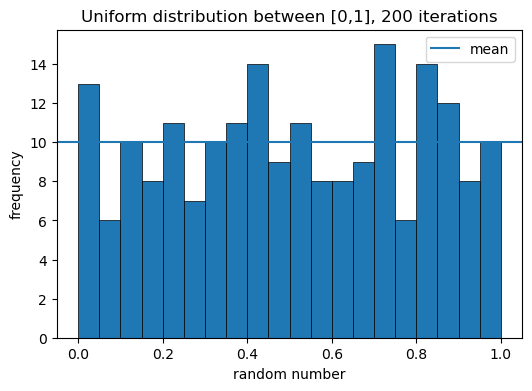

In [76]:
np.random.seed(SEED) # set seed
start = 0 # minimum random number size
end = 1   # max random number size
number_iterations = 200
density = False # effectively normalises frequency, total area = 1
uniform_histogram(start,end,number_iterations, bin_size=0.05, density=density);

There is some variation in the frequencies. The probability of each bin having a certain height is binomially distributed - but a gaussian distribution is a good approximation. 
For $n = 200$ samples, the probability of choosing a certain bin in the uniform case is 
$$p = \dfrac{1}{\text{number of bins}} = 0.05,$$ for bins of size 0.05 units.
So the average number of datapoints in a bin is given by $a = np = 10$ for the  above case.
Using the normal approximation, the stardard deviation is given by the square root of the number of samples in the bin $\sigma_a \approx \sqrt{a} = \sqrt{10} \approx 3$. So in each bin $10 \pm 3$ samples are allowed. Using the binomial distribution, where the variance is given by 
$$Var(a) = np(1-p) = a(1-\frac{a}{n})$$ 
$$\therefore \sigma_a = \sqrt{np(1-p)} = \sqrt{\frac{a(n-a)}{n}} = \sqrt{\frac{10(200 - 10)}{200}} = \sqrt{9.5} \approx 3 $$
which is approximately the same in this low sample case.
The distribution becomes more uniform (all bins appear to approach the mean) as the number of iterations is increased, so a large number of iterations is needed for accurate results. As shown below:

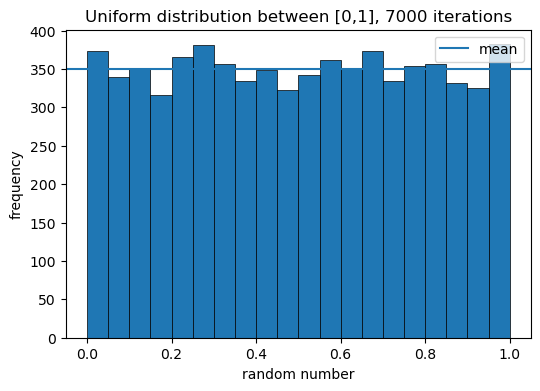

In [77]:
np.random.seed(SEED)
number_iterations = 7000 # increase number of iterations
density = False # effectively normalises frequency, total area = 1
uniform_histogram(start,end,number_iterations, bin_size=0.05, density=density);

So numpy.random.uniform() is producing uniformly distributed random numbers. To check if the numpy.random.uniform() is generating independent random numbers, we use can plot triplet (x,y,z) values in 3D. The algorithm numpy uses to produce pseudo random numbers is known as a Mersenne Twister.

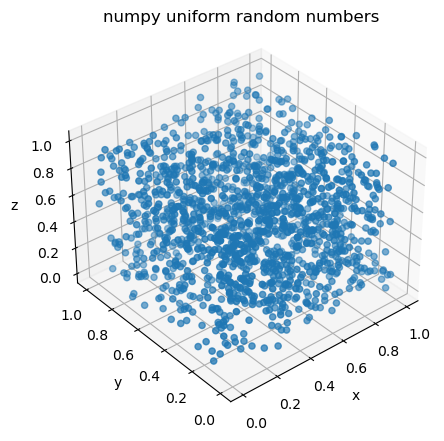

In [78]:
def plot_3d_uniform(number_points, figsize=FIGSIZE_3D):
    """
    plots *number_points* number of points on a 3d plot. uses numpy.random.uniform
    RNG. x,y,z values are consecutive calls to the function.

    Parameters
    ----------
    number_points : int
        number of points to be plot, 3N random numbers generated.
    figsize : tuple of floats, optional
        figsize as in matplotlib documentation, tuple of width by height
        default is (6,4).

    Returns
    -------
    None.

    """
    # produce random numbers
    random_nums = np.random.uniform(size= (number_points*3)) # or size = (number_points, 3)
    
    # slice the array to obtain every 3 values per dimension
    x = random_nums[0::3]
    y = random_nums[1::3]
    z = random_nums[2::3]
    
    # scatter plot in 3d
    axes = plt.figure(figsize=figsize).add_subplot(111, projection = '3d')
    axes.scatter(x,y,z)
    
    # label the axis and title
    axes.set_xlabel('x')
    axes.set_ylabel('y')
    axes.set_zlabel('z')
    axes.set_title('numpy uniform random numbers')
    
    # set view for easier access to rotation
    axes.view_init(elev=35., azim=-130.)
    plt.show()
np.random.seed(SEED)
plot_3d_uniform(1500)

These appear to be uniformly distributed and independent. In comparison, a linear congruential random number generator causes spectral issues - three consecutive random numbers produced by this type of pseudo random number generator exist on hyperplanes. While this is a serious issue, there are still many uses for them as long as the values produced are used carefully. One of the advantages of Linear Congruential (LCG) random number generators are their simplicity and ease of generation without needing to calculate intermediate values in the sequence. Note: they are not used in this notebook for any monte carlo methods.

In [79]:
#  RANDSSP Multiplicative congruential uniform random number generator.
#  Based on the parameters used by IBM's Scientific Subroutine Package.
#  The statement
#     r = randssp(m,n)
#  generates an m-by-n random matrix.
#  The function can not accept any other starting seed.
#
#  This function uses the "bad" generator parameters that IBM
#  used in several libraries in the 1960's.  There is a strong
#  serial correlation between three consecutive values.

def randssp(p,q):
    global m, a, c, x   
    try: x
    except NameError:
        m = pow(2, 31)
        a = pow(2, 16) + 3
        c = 0
        x = 123456789
    
    try: p
    except NameError:
        p = 1
    
    try: q
    except NameError:
        q = p
    
    r = np.zeros([p,q])
    for l in range (0, q):
        for k in range (0, p):
            x = np.mod(a*x + c, m)
            r[k, l] = x/m
    return r

The function above generates p by q matrix of random numbers, sequentially produced using a LCG algorithm. The hyperplanes are plotted below.

In [80]:
def plot_hyperplane(number_points, figsize=FIGSIZE_3D):
    """
    plots hyperplanes generated by LCG
    
    Parameters
    ----------
    number_points : int
        number of points to be plot, 3N random numbers generated.
    figsize : tuple of floats, optional
        figsize as in matplotlib documentation, tuple of width by height
        default is (6,4).

    Returns
    -------
    None.

    """
    # produce a 2D array with 3 column and 1500 row sequence of random numbers
    k = randssp(3, number_points)

    # produce the figure and scatter the x, y, z points
    ax = plt.figure(figsize=figsize).add_subplot(projection = '3d')
    ax.scatter(k[0, :], k[1, :], k[2, :], color='r')

    # hyperplanes visible when azimuthal, elevation angle is -130, 35 degrees.
    ax.view_init(elev=35., azim=-130.)

    # label axes and title
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title('LCG Hyperplanes')

    plt.show()

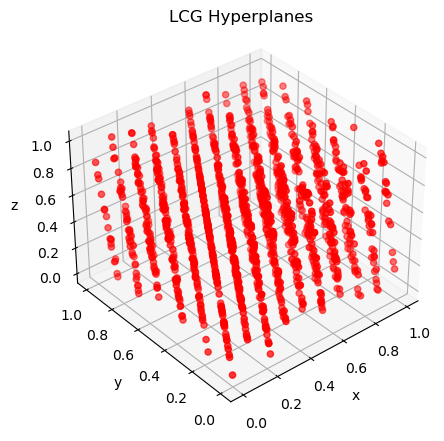

In [81]:
np.random.seed(SEED)
plot_hyperplane(1500) # call function

comparatively, the previous plot (produced using numpy) does not have these spectral issues. Note that numpy generates its random numbers using Mersenne Twister by default.

### A random number generator for the exponential function 𝐞𝐱𝐩 (−𝒙/𝝀), where 𝝀 is the mean free path.

Samples for any distribution can be generated if the inverse CDF (cumulative distribution function) is known. For the exponential distribution the PDF (probability density function) is given by 
    $$
    P[x] = e^{-x/\lambda}, 
    $$
where $\lambda$ is the mean free path.
The CDF is given by $\int_0^{\infty}P[x] = 1-e^{-x/\lambda}.$ Then finding the inverse to get
    $$
    \text{CDF}^{-1}= s_i = -\lambda \ln(u_i),
    $$
where $u_i$ is a uniform random number between 0 and 1. Exponentially distributed points for some mean free path is given by the class below. In the sample method, depending on truth value of cdf_method the random numbers are generated either using the info above i.e. manually implementing the generation of exponentially distributed numbers (using uniform numbers produced by numpy.random.uniform()).

In [82]:
# the class defined below may be useful once expanded to include densities and cross sections 
# as input - then the methods could return mean free paths and distributions with less calculations for the user
class ExponentialDistribution:
    """
    A class for the exponential distribution
    
    Attributes 
    ----------
    mean_free_path : float
        the mean free path or inverse rate of the distribution
    
    Methods
    -------
    sample(size=None)
        returns a float or list of floats of size *size* with exponentially
        distributed random numbers
    """
    def __init__(self, mean_free_path):
        """
        Parameters
        ----------
        mean_free_path : float
            the mean free path or inverse rate of the distribution.

        """
        self.mean_free_path = mean_free_path
    
    def sample(self, size=None):
        """
        generates *size* exponentially distributed random numbers. if no argument 
        given for size then one number is generated
    
        Parameters
        ----------
        mean_free_path : float
            the mean free path or inverse rate for the exponential distribution.
        size : int or None, optional
            the number of points to be generated. The default is None which will
            produce one point.
    
        Returns
        -------
        float or numpy array of floats
            the exponentially distributed random numbers.
    
        """
        uniform_rand = np.random.uniform(size=size)
        return -self.mean_free_path*np.log(uniform_rand) 

The following function is for plotting some exponentially distributed random numbers.

In [83]:
def plot_exponential(mean_free_path, random_nums, show=1, title=None):
    """
    for a set of random numbers, plots the histogram and an analytic pdf is
    superimposed using the *input mean_free_path*. 
    
    Parameters
    ----------
    mean_free_path : float
        the mean free path or inverse rate of the exponential distribution.
    random_nums : numpy array
    of exponentially distributed random numbers.
    show : bool, optional
        if True plt.show() and plt.legend() are executed. The default is 1.
    title : str, optional
        the title of the plot, can be None. The default is None.
    
    Returns
    -------
    counts : numpy array
        the counts in each bin.
    bins : numpy array
        the edges of each bin.
    
    """
    # print a simple mean
    print(f'the mean of the exponentially distributed sample is: {np.mean(random_nums):0.3f}')
    fig = plt.figure(figsize=FIGSIZE)
    axes = fig.add_subplot(111)
    
    # bins and histogram plotting
    bin_size = 5 # cm
    br = np.arange(0,np.max(random_nums),bin_size)
    counts, bins,_ = axes.hist(random_nums,bins=br,density=False,ec="black",lw=0.5)

    # Superimpose true pdf
    x = np.linspace(1,300,100)  # Set x values for pdf
    pdf_exponential = bin_size*(random_nums.size/mean_free_path)*np.exp(-x/mean_free_path)
    axes.plot(x,pdf_exponential, label='analytic exponential pdf') # Add the curve to the plot.
   
    axes.set_xlabel('x')
    axes.set_ylabel('Number of points')
    axes.set_title(title)
    
    if show:
        plt.legend()
        plt.show()
    return counts, bins

The number of neutrons $N_L$ absorbed in a thin layer is given by 
    \begin{equation}
    N_L = n\sigma I L
    \end{equation}
where $I$ is the neutron intensity, $L$ is the thickness of the material, $n$ is the number density of absorping molecules and $\sigma$ is the cross section for absorption. Then the rate of absorption per unit thickness is given by
    \begin{equation}
    R = -\frac{dI}{dx} = n\sigma I.
    \end{equation}
so the intensity varies with thickness as 
    \begin{equation} 
    I(x) = e^{-n\sigma x} = e^{-x / \lambda}.
    \end{equation}
The mean free path of water in the absence of scattering can be calculated using the equation
    \begin{equation} 
    \lambda = 1/\Sigma, 
    \end{equation}
where $\Sigma$ is the macroscopic cross for absorption section. The macroscopic cross section can be calculated using:
    \begin{equation}
    \Sigma = n\sigma, 
    \end{equation}
where $\sigma$ is the cross section for a process and $n$ is the number density calculated using
    \begin{equation} 
    n = \frac{\rho N_A}{M},
    \end{equation}
where $\rho$, $N_A$, $M$ is respectively the density, Avogadros number and molar mass. Applying these equations for absorption in water (using Table 1) where:
<br>$\sigma_a = 0.6652$ barn,
<br>$M = 18.0153$ g/mol
<br> and  $\rho = 1$ g/cm$^3$
<br> to obtain $\lambda_a = 1/n\sigma_a = \dfrac{M}{\rho N_A\sigma_a} = \dfrac{18.0153~\text{g/mol}}{1~\text{g/cm}^3 \cdot 6.0221\times10^{23}~\text{/mol}\cdot 0.6652\times10^{-24}~\text{cm}^2} = 45.0 \text{ cm}$.

In [84]:
# calculate the mean free path
mfp_water_absorb = 18.0153 / (6.0221e23 * 0.6652e-24)
print(f'The mean free path for absorption in water is{mfp_water_absorb: .2f} cm')

The mean free path for absorption in water is 44.97 cm


So the mean free path is 45.0 cm for water, when considering only absorption.

the mean of the exponentially distributed sample is: 47.280


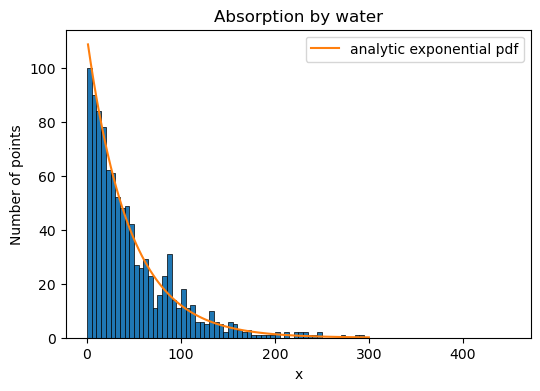

In [85]:
np.random.seed(SEED)
# use class to produce an exponential distribution with mean free path calculated above
expon_dist_water_absorb = ExponentialDistribution(mfp_water_absorb) 

size = 1000 # increase samples to obtain more accurate results below

# call the sample() method from the ExponentialDistribution class to obtain numbers
exponential_numbers_water_absorb = expon_dist_water_absorb.sample(size=size)

# calculate mean, plot the numbers, and superpose a pdf, also returning the count and bins.
counts, bins = plot_exponential(mfp_water_absorb, exponential_numbers_water_absorb,
                                title='Absorption by water')

To see the statistical variation, we can determine the mean free path of the data and compare it to the analytic input. The data from the histogram can be plotted linearly by taking the logarithm of $N_R \propto e^{-x/\lambda}$ to get,
    \begin{equation*}
    \ln{N_R} = \frac{-x}{\lambda} + c, 
    \end{equation*}
which is linear in $x$ with gradient $-1/\lambda$; $c$ is a constant related to the constant of proportionality of $N_R$. The fit needs to be weighted so that bins with lower statistical error are favoured. If we use the normal approximation that relates the error on the count in a bin to be ~ the square root of the number in the bin we see that as distance increases, and the number of counts in each bin decreases, then the proportional error increases. So when fitting this gradient a weight of 1/x was used. Note that the alternative way to weight this plot would include generating multiple histograms finding a mean and standard devation in each bin, and plotting the mean with the standard deviation/mean as the weight.

In [86]:
# since the bins returned from histogram are the bin edges
# need a function to centre the bins
def centre_bins(bins):
    """
    centres bins from a histogram

    Parameters
    ----------
    bins : array of floats size m
        array of edges of bins.

    Returns
    -------
    array of floats size m-1
        the middle values between the bins, one less element.

    """
    return (bins[:-1] + bins[1:]) / 2

In [87]:
def plot_log_scatter(counts, bins):
    """
    plots scatter of ln(count) vs bins  with the best fit linear plot and
    returns the best fitting linear plot

    Parameters
    ----------
    counts : array of floats
        the counts found in each bin.
    bins : array of floats
        the location along x that denote the bin edges.

    Returns
    -------
    gradient : float
        -1/mean_free_path, from the polyfit.
    gradient_error : float
        error on the gradient, covariant matrix sqrt.

    """
    # centres the bins of the histogram
    centred_bins = centre_bins(bins)
    
    # find index of bins with >0 counts using np.where
    non_zero_counts = np.where(counts > 0)
    
    # slice the count and bin array to only include non zero values
    bins_plot = centred_bins[non_zero_counts]
    counts_adjusted = counts[non_zero_counts]
    
    # natural log of counts
    log_counts = np.log(counts_adjusted) 
    
    # poly fit linear, weight with 1/x as the spread increases proportional to x
    result= np.polyfit(bins_plot, log_counts, deg=1, cov=True, w=1/bins_plot)
    gradient = result[0][0]
    gradient_error = np.sqrt(result[1][0,0])
    x=np.linspace(0, max(bins_plot),20)
    y= x*gradient + result[0][1]
    
    # plot both results
    axes = plt.figure(figsize=FIGSIZE).add_subplot(111)
    axes.scatter(bins_plot, log_counts, label='Histogram data', s=10)
    axes.plot(x,y, label=fr'Polyfit result 1/$\lambda$ = {-gradient:.4g} '
              fr'$\pm$ {np.sqrt(gradient_error):.2g}', color='red', 
             alpha=0.7)
    axes.axhline(0, color='gray', linewidth=0.5, alpha=0.25)
    axes.axvline(0, color='gray', linewidth=0.5, alpha=0.25)
    axes.set_ylabel(r'ln($N_R$)')
    axes.set_xlabel('x')
    
    plt.legend()
    plt.show()
    
    return gradient, gradient_error

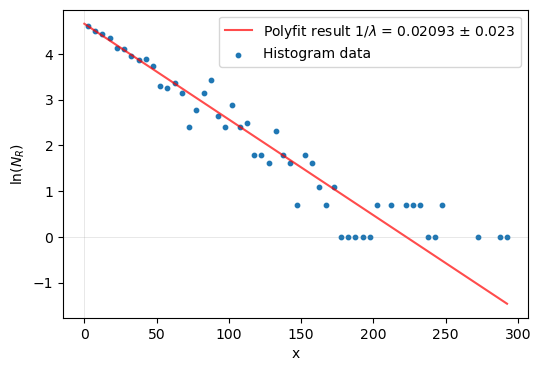

The attenuation length in water for absorption is 47.8 +/- 1.2


In [88]:
# np.random.seed(SEED)
# find the gradient and its uncertainty
gradient, gradient_error = plot_log_scatter(counts, bins)

#This corresponds to an attenuation length of 
attenuation_water_absorb = 1/-gradient

# the fractional error on the inverse is constant so find the error on 1/gradient
attenutation_wat_abs_error = gradient_error/-gradient * attenuation_water_absorb
print(f'The attenuation length in water for absorption is {attenuation_water_absorb:.3g} '
      f'+/- {attenutation_wat_abs_error:.2g}')


The mean free path is recovered, but not exactly. Increasing the number of iterations *('size' variable 4 cells up)* allows for a more accurate result that approaches the input with a smaller error. So the weight method seems to work, and visually this is confirmed from the above plot.

### Phase 2 - direction and step size of a random walk

#### Producing istroptic vectors of unit length.
Since the goal is to produce vectors of identical length but isotropically varying direction we can use polar coordinates and set the radius to 1. By generating two angles $\theta$ (polar) and $\varphi$ (azimuthal) we can specify the direction. But to account for a smaller cross sectional area near the poles, the polar angle needs to be more probable near the equator. This is accounted for by using the inverse cosine function as a CDF$^{-1}$. 

\begin{equation}
\begin{split}
r &= \text{constant} \\ 
x_i & = r\sin(\theta_i)\cos(\varphi_i) \\
y_i & = r\sin(\theta_i)\sin(\varphi_i) \\
z_i & = r\cos(\theta_i) \\
\end{split}\\
\end{equation}

with $0 < \theta_i < \pi$ and $0 < \varphi_i < 2\pi$. The arccos function for generating polar angles is 
$$\theta_i = \arccos(1-2u_i)$$ where $u_i$ is a uniform random number between 0 and 1. This function looks like this:

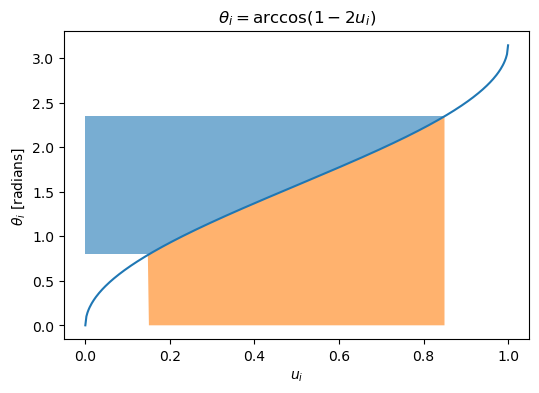

In [89]:
def plot_arccos():
    """
    plots arccos function arccos(1-2x) where x ranges from 0 to 1. highlights 
    regions near theta = pi/2.

    Returns
    -------
    None.

    """
    # generate linearly spaced numbers from 0-1
    x = np.linspace(0,1, 400)
    
    # calculate the arccosine of the numbers
    y = np.arccos(1-2*x)
    
    # plot the function
    axes = plt.figure(figsize=FIGSIZE).add_subplot(111)
    axes.plot(x, y)

    # choose bounds for 'likely' region
    x1 = 0.15
    x2 = 0.85

    # fill regions with color
    axes.fill_between(x, np.arccos(1-2*x1),np.arccos(1-2*x2), interpolate=True, alpha=0.6)
    axes.fill_between(x, y, interpolate=True, alpha=1, color='white')
    axes.fill_between(x, y,where= (x1 < x)&(x < x2), interpolate=True, alpha=0.6)
    
    axes.set_xlabel(r'$u_i$')
    axes.set_ylabel(r'$\theta_i$ [radians]')
    axes.set_title(r'$\theta_i = \arccos(1-2u_i)$')
    plt.show()
plot_arccos()

The highlighted region shows how a large range of $u_i$ will correspond to an angle near the equator ($\theta = \pi/2$). Now we can produce the isotropic direction function that returns some (x,y,z) value:

In [90]:
def isotropic_direction(radius=1, size=None):
    """
    produces x y z triplets distributed isotropically on unit sphere. the 
    radius can be scaled

    Parameters
    ----------
    radius : float, optional
        the length of the step. The default is 1.
    size : int, optional
        number of iterations. The default is None, which produces a 1d array containing 3 elements.


    Parameters
    ----------
    radius : TYPE, optional
        DESCRIPTION. The default is 1.
    size : TYPE, optional
        DESCRIPTION. The default is None.

    Returns
    -------
    numpy array of floats
        x y z values, if size > 1 then x y z values exist in sub arrays.

    """
    # generate random azimuthal from 0 to 2pi
    phi = np.random.uniform(low=0, high=2*np.pi, size=size)
    
    # produce a polar angle, with higher distribution near equator - by using 
    # arccos like an inverse cdf
    theta = np.arccos(1-2*np.random.uniform(size=size))
    
    # cast these angles to cartesian coordinates
    x = radius*np.sin(theta)*np.cos(phi)
    y = radius*np.sin(theta)*np.sin(phi)
    z = radius*np.cos(theta)
    
    return np.array([x,y,z])
print(f'An example of the output of isotropic_direction is: {isotropic_direction(size=None)}')

An example of the output of isotropic_direction is: [ 0.83136256 -0.33946724  0.43999805]


In [91]:
def isotropic_scatter(number_points):
    """
    uses isotropic_direction() to produce *number_points* randomly distributed 
    steps. plots them on 3d graph

    Parameters
    ----------
    number_points : int
        number of points to generate.

    Returns
    -------
    None.

    """
    # produce isotropic direction xyz values
    x,y,z = isotropic_direction(size=number_points)
    
    # scatter plot in 3d
    axes = plt.figure(figsize=FIGSIZE_3D).add_subplot(111, projection = '3d')
    axes.scatter(x,y,z, s=3)
    
    # label the axis and title
    axes.set_xlabel('x')
    axes.set_ylabel('y')
    axes.set_zlabel('z')
    axes.set_title(f'isotropic direction, N = {number_points}')
    
    # set view for easier access to rotation
    axes.view_init(elev=35., azim=-130.)
    plt.show()

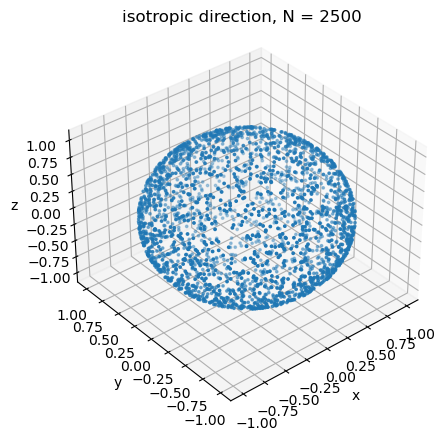

In [92]:
# produce 2500 points to scatter
isotropic_scatter(2500)

The points are scattered evenly on the unit sphere without areas of high/low concentration. If direction is biased this would cause systematic errors in the simualtion results, for example if the poles were favoured this would increase the number of absorbed particles, since (in the monte carlo method further on) we are simulating a slab that is infinite in the z direction (as in the plot)

#### producing steps with lengths distributed as 𝐞𝐱𝐩 (−𝒙/𝝀)
Using the above function, by scaling the radius by an exponentially distributed random number - we can produce steps with isotropic direction, but lengths that vary as an exponential distribution - i.e. shorter steps are more likely. 

In [93]:
def exponential_step(mean_free_path, size=None):
    """
    takes *size* isotropic steps with radius scaled as an exponential distribution

    Parameters
    ----------
    mean_free_path : float
        mean free path for the distribution.
    size : int, optional
        the number of steps to be generated. The default is None.

    Returns
    -------
    numpy array
        an array containing x y z values in indexes 0,1,2 respectively.

    """
    exponential_scale = ExponentialDistribution(mean_free_path).sample(size=size)
    return isotropic_direction(radius=exponential_scale, size=size)

Now plot this on a 3d scatter graph:

In [94]:
def exponential_scatter(mean_free_path, number_points):
    """
    uses exponential_step function to produce *number_points* exponentially
    distributed steps. plots them on 3d graph
    
    Parameters
    ----------
    number_points : int
        number of points to generate.
    
    Returns
    -------
    None.
    
    """
    # produce exponential steps xyz values
    x,y,z = exponential_step(mean_free_path, size=number_points)
    
    # scatter plot in 3d
    axes = plt.figure(figsize=FIGSIZE_3D).add_subplot(111, projection = '3d')
    axes.scatter(x,y,z, s=3)
    
    # label the axis and title
    axes.set_xlabel('x [cm]')
    axes.set_ylabel('y [cm]')
    axes.set_zlabel('z [cm]')
    axes.set_title(f'exponentially distributed step, N = {number_points}')
    
    # set view for easier access to rotation values without interactive plot
    axes.view_init(azim=-60., elev=30.)
    plt.show()

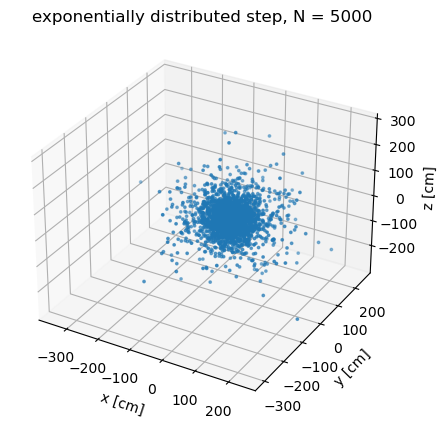

In [95]:
# using mean free path of 45 cm, and 1000 points
exponential_scatter(mean_free_path = 45, number_points = 5000)

And this seems to be as expeced, with most of the points concentrated near the centre with some points at a larger distance away. 

#### Multiple processes + theory
For a system with multiple cross sections such as scattering and absorption, the total macroscopic cross section $\Sigma_T$ is the sum of the microscopic cross sections multiplied by their respective site number densities, 
\begin{equation} \Sigma_T = \Sigma_1 +\Sigma_2 + \cdots = n_1\sigma_1 + n_2\sigma_2 + \cdots.\end{equation}
Then similarly the total mean free path is given by $1/\Sigma_T$. The probability of a certain process occuring $P_j$ is given by 
\begin{equation} P_j = \frac{\Sigma_j}{\Sigma_T}, \end{equation}
where $\Sigma_j$ is the macroscopic cross section for that process. The distance a neutron can travel before interaction is given by $s_i = -\lambda_t\ln(u_i)$, where $u_i$ is a radom uniform number between 0 and 1.
Generating $u_i$ and comparing it to the probability of a process $P_j$ allows for the correct rates of absorption and scattering to be simulated, depending on the size $u_i$ relative to $P_j$. For example, if $u_i < P_j$ then process $P_j$ occurs.

### Phase 3 - simulating the behaviour of neutrons travelling through water, lead, and graphite under various conditions

calculations to perform: 
percentage absorption/transmission/reflection in 10cm water, lead,graphite
variations on these when varying slab thickness


The aim of this project is to develop a computational simulation to study the absorption and scattering processes of thermal neutrons passing through a shielding layer of thickness 𝑳.

$$
\begin{aligned}
& \text {Table 1: Thermal neutron data for water, lead and graphite.}\\
&\begin{array}{l|ccc}
\hline \hline  & \text { water } & \text {lead } & \text { graphite }\\
\hline \text{Absorption, $\sigma_a$ (barn)} & 0.6652 & 0.158 & 0.0045 \\
\text{Scattering, $\sigma_s$ (barn)} & 103.0 & 11.221 & 4.74 \\
\text{Density, $\rho$ (g/cm$^3$)} & 1.00 & 11.35 & 1.67 \\
\text{Molar Mass, $M$ (g/mol)} & 18.0153 & 207.2 & 12.011 \\
\hline
\end{array}
\end{aligned}
$$

The data provided in Table 1 is for thermal neutrons only, where scattering is much more probable than absorption $(\sigma_s >> \sigma_a)$. In this simulation every neutron starts from one surface at normal incidence (i.e. only non zero velocity component is in the $x$ direction for a slab spanning the y,z plane between the bounds of $x=0$ and $x=L$).

##### Determining Material Properties

Each material can be represnted by an instance of the Material class. A dictionary of all the given information about the material can be fed into the class via the dictionary unpacking tool. Any calculations needed (such as for the individual/total macroscopic cross sections) are performed once when the \__init\__ method runs for each instance. 

In [96]:
lead_dict = {'material': 'Lead',
            'cross_absorption_micro': 0.158, 'cross_scattering_micro': 11.221,
            'density': 11.35, 'molar_mass': 207.2}
water_dict = {'material': 'Water',
             'cross_absorption_micro': 0.6652, 'cross_scattering_micro': 103.0,
             'density': 1.00, 'molar_mass': 18.0153}
graphite_dict = {'material': 'Graphite',
                'cross_absorption_micro': 0.0045, 'cross_scattering_micro': 4.74,
                'density': 1.67, 'molar_mass': 12.011}

In [97]:
class Material:
    """
    method that creates a material object and calculates various quantities 
        macroscopic cross sections (absorption/scattering/total)
        mean free paths (a/s/t)
        probability (a/s)
        number density

    Attributes
    ----------
    material : string
        the name of the material .
    cross_absorption_macro : float
        microscopic absorption cross section in barn.
    cross_scattering_macro : float
        microscopic scattering cross section in barn.
    density : float
        the density of material in g/cm^3.
    molar_mass : float
        molar mass in g/mol.

    Methods
    -------


    """

    def __init__(self, material, cross_absorption_micro,
                 cross_scattering_micro, density, molar_mass):
        """
        calculates all relevant values for the material. Note not as methods 
        to avoid running the same method multiple times.
        calculates 
            number density
            macroscopic absorption/scattering/total cross sections 
            absorption/scattering/total mean free paths
            probabilitie of absorption/scattering


        Parameters
        ----------
        material : string
            the name of the material .
        cross_absorption_macro : float
            microscopic absorption cross section in barn.
        cross_scattering_macro : float
            microscopic scattering cross section in barn.
        density : float
            the density of material in g/cm^3.
        molar_mass : float
            molar mass in g/mol.

        """
        self.material = material
        self.cross_absorption_micro = cross_absorption_micro
        self.cross_scattering_micro = cross_scattering_micro
        self.density = density
        self.molar_mass = molar_mass

        # macroscopic cross sections
        try:
            number_density = (self.density * 6.02214076e+23)/self.molar_mass
        except ZeroDivisionError:
            number_density = 0
        cross_absorption_macro = self.cross_absorption_micro * 1e-24 * number_density
        cross_scattering_macro = self.cross_scattering_micro * 1e-24 * number_density
        cross_total_macro = cross_absorption_macro + cross_scattering_macro

        # mean free paths
        try: 
            mean_free_scatter = 1/cross_scattering_macro
            mean_free_absorb = 1/cross_absorption_macro
            mean_free_total = 1/cross_total_macro
        except ZeroDivisionError:
            mean_free_scatter = np.inf
            mean_free_absorb = np.inf
            mean_free_total = np.inf
            
        # probabilities
        try:
            probability_absorb = cross_absorption_macro/cross_total_macro
            probability_scatter = cross_scattering_macro/cross_total_macro
        except ZeroDivisionError:
            probability_absorb = 0
            probability_scatter = 0

        self.number_density = number_density
        self.cross_absorption_macro = cross_absorption_macro
        self.cross_scattering_macro = cross_scattering_macro
        self.cross_total_macro = cross_total_macro

        self.mean_free_scatter = mean_free_scatter
        self.mean_free_absorb = mean_free_absorb
        self.mean_free_total = mean_free_total

        self.probability_scatter = probability_scatter
        self.probability_absorb = probability_absorb

    def __str__(self):
        return (f'--Intrinsic Values --\n'
                f'material = {self.material},\n'
                f'micro absorption cross sec = {self.cross_absorption_micro:} barn,\n'
                f'micro scattering cross sec = {self.cross_scattering_micro:} barn,\n'
                f'density = {self.density} g/cm^3,\n'
                f'molar mass = {self.molar_mass} g/mol,\n'
                '--Calculated values--\n'
                f'number density = {self.number_density:.3e} cm^-3,\n'
                f'macro absorption cross sec = {self.cross_absorption_macro:.4f} cm^-1,\n'
                f'macro scattering cross sec = {self.cross_scattering_macro:.4f} cm^-1,\n'
                f'macro total cross section = {self.cross_total_macro:.4g} cm^-1,\n'
                f'mean free path absorption = {self.mean_free_absorb:.4g} cm,\n'
                f'mean free path scattering = {self.mean_free_scatter:.4g} cm,\n'
                f'mean free path total = {self.mean_free_total:.4g} cm,\n'
                f'probability absorption = {self.probability_absorb:.3g},\n'
                f'probability scattering = {self.probability_scatter:.3g}\n')

Now we can create an instance for each material. Also, the full output for water will be printed but only select values for lead and graphtie to avoid a large wall of numbers. 

In [98]:
water = Material(**water_dict)
lead = Material(**lead_dict)
graphite = Material(**graphite_dict)
materials = [water, lead, graphite]

# print full calculation for water
print(water)

# print total mean free paths

#print(lead,'\n',graphite) # commented out to avoid clutter
print('Total mean free paths:')
for material in materials:
    print(f'{material.material:-<9} {material.mean_free_total:.3f} cm')

# only print probabilities for absorption to scattering
print('\nabsorption to scattering probabilities:')
for material in materials:
    print(f'{material.material:-<9} '
          f'{material.probability_absorb:.3f}:{material.probability_scatter:.3f}')

--Intrinsic Values --
material = Water,
micro absorption cross sec = 0.6652 barn,
micro scattering cross sec = 103.0 barn,
density = 1.0 g/cm^3,
molar mass = 18.0153 g/mol,
--Calculated values--
number density = 3.343e+22 cm^-3,
macro absorption cross sec = 0.0222 cm^-1,
macro scattering cross sec = 3.4431 cm^-1,
macro total cross section = 3.465 cm^-1,
mean free path absorption = 44.97 cm,
mean free path scattering = 0.2904 cm,
mean free path total = 0.2886 cm,
probability absorption = 0.00642,
probability scattering = 0.994

Total mean free paths:
Water---- 0.289 cm
Lead----- 2.664 cm
Graphite- 2.517 cm

absorption to scattering probabilities:
Water---- 0.006:0.994
Lead----- 0.014:0.986
Graphite- 0.001:0.999


From the above, from highest to lowest the probability of absorption goes from graphite, water, and lead. Since lead and graphite have much larger total mean free paths $\lambda_T$ than water - we expect more transmissions to occur for these materials. The dominant processes for neutrons incident on water will be reflection and absorption.

### Visualising neutron random walks

To visualise a random walk, the path of a neutron needs to be stored. This is done by the below function. The efficiency an algorithm that follows neutrons is lower than one that just counts the numbers of transmitted/reflected/absorbed, so this function will not be used to obtain simulation results. However, given enough time this function should reporoduce the same results as the following functions that only count. 

To avoid excessive use of loops, the below function assumes neutrons will not take more than 200 steps before a process occurs. Naturally the number of steps depends on the material values such as probabilities of absorption and mean free path. However if necessary the upper limit on the steps can be increased. Also, in the function the initial yz position can be set and since the plane is infinite this should not make a difference to any values obtained.

In [99]:
# neutron random walks, looking at neutrons individually
def neutron_steps(material, number_steps=200, length=10, initial_yz = (0,0)):
    """
    follows a neutron path by generating many isotropic steps with expoentially 
    distributed radii, finding the cumulative sum of x position, checking where
    the x position is negative (reflected) or >length (transmitted). also generates
    number_steps uniform random numbers u_i and compares them to probability of 
    absorption for that material (absorption on that index if u_i  < P_a)
    -for the lowest index where one of these conditions occur - this is the 
    chosen process for this neutron.

    Parameters
    ----------
    material : class '__main__.Material'
        an instance of the Material class.
    number_steps : int, optional
        the max number of steps a particle could theoreticall take, normally 
        a process occurs before this number can be reached. this will need to 
        increased for larger length materials to allow for a fair chance of 
        transmission. The default is 200.
    length : float, optional
        the thickness of the material in the x direction that the neutron is
        travelling through in cm. The default is 10.
    initial_xy : array like of floats, two elements, optional
        the initial position in the yz plane (always starts at x = 0). Default
        is (0,0)

    Returns
    -------
    dict
        dictionary with keys path : the cumulative path of the particle,
        r_t_a : [reflected, transmitted, absorbed] a 1 in the index of the process
            that killed the neutron, 0s elsewhere
        process : string, process that occured
        step : the step number that this process happened on

    """
    
    # extract mean free path and produce exponential distribution
    mean_free_path = material.mean_free_total
    exponential = ExponentialDistribution(mean_free_path)
    
    # produce many steps (x,y,z) values with exponetially scales radii
    expi = exponential_step(mean_free_path,size=number_steps)
    
    # insert the first step (which is only along the x direction)
    steps = np.insert(arr=expi,obj=0,values=[[exponential.sample(),0,0]],axis=1)
    steps = np.insert(arr=steps, obj=0, values=[[0,initial_yz[0],initial_yz[1]]], axis=1) 
    
    # cumulative sum of x axis
    cumulative_steps = steps.cumsum(axis=1).transpose()
    x_position = cumulative_steps[:,0]
    
    # check where postion goes negative
    steps_reflected = np.nonzero(x_position < 0)[0]
    
    # check where position goes greater than length of slab
    steps_transmitted = np.nonzero(x_position > length)[0]
    
    # check for absorption by producing a list of uniform numbers for every step
    uniform_rands = np.random.uniform(size=number_steps)
    uniform_rands[0] = np.inf # cant be absorbed on 0
    
    # check which numbers are below absorption probability 
    steps_absorbed = np.nonzero(material.probability_absorb > uniform_rands)[0]

    # check for 0th index (first transmission, reflection, absorption)
    # if IndexError then the length of the array is 0 and hence does not occur
    try:
        step_reflected = steps_reflected[0]
    except IndexError:
        step_reflected=np.inf # use np.inf so > < = comparisons work (not with None)
        
    try:
        step_transmitted = steps_transmitted[0]
    except IndexError:
        step_transmitted = np.inf
    
    try:
        step_absorbed = steps_absorbed[0]
    except IndexError:
        step_absorbed = np.inf
    
    # find which process occurs first
    which_step = [step_reflected, step_transmitted, step_absorbed]
    # check which index is the smallest (thus process that killed this neutron)
    # note: if two simultaneous - takes first in order reflect transmit absorb 
    mins = which_step.index(min(which_step))
    
    # produce an array of 0s and place a 1 in the index of the process 
    processes = ['reflected', 'transmitted', 'absorbed']
    reflect_transmit_absorb = [0,0,0]
    reflect_transmit_absorb[mins] = 1
    
    # also extract which process occured
    process = processes[mins]
    
    # include two extra step (to see the final state for reflection and transmission)
    final_step = which_step[mins]
    if reflect_transmit_absorb[0] or reflect_transmit_absorb[1]:
        final_step += 1
    
    cumulative_steps = cumulative_steps[0:final_step, :]
    return {'path':cumulative_steps, 
            'r_t_a':np.array(reflect_transmit_absorb),
            'process':process,
            'step':which_step[mins]}

The ouptut of the function above is shown below. Then, a few random walks per material is plotted below.

In [100]:
np.random.seed(SEED)
start_one_neutron = timer.time() # get start time

material = lead # or water/ graphite
length = 10     # depth of slab cm
out = neutron_steps(material, number_steps=500, length=length)

print(f"this neutron was {out['process']} at step {out['step']} \nPath, cumulative: (x y z)")
print(out['path']) 

print(f'runtime: {timer.time() - start_one_neutron:.5f} s') # print runtime

this neutron was absorbed at step 7 
Path, cumulative: (x y z)
[[ 0.          0.          0.        ]
 [ 1.14103623  0.          0.        ]
 [ 1.35537415  0.36698704 -0.77418959]
 [ 8.20296801  2.81363395  2.78870338]
 [ 8.26875556  2.92960082  2.71530928]
 [ 8.40903539  2.7254692   1.74385001]
 [ 8.675607    3.24327724  3.0669743 ]]
runtime: 0.00138 s


It is clear that the particle is starting at the origin and taking the first step in the x direction then being scattered and eventually absorbed. The random walks can be visualised using the following function. For some material, the function generates a random walk and plots the line with a colour that corresponds to which process it was killed by.

In [101]:
#%matplotlib notebook
def plot_one_random_walk(material,length, number_steps=500, axes=None,
                         figsize=FIGSIZE_3D, fig=None, subplot=111, color_line=1,
                         elev_azim=(16., -103.), yz_pos=(0,0)):
    """
    plots the random walk for one neutron fired into a material of length *length*

    Parameters
    ----------
    material :  class '__main__.Material'
        an instance of the Material class.
     length : float
        the thickness of the material in the x direction that the neutron is
        travelling through in cm.
    number_steps : TYPE, optional
        the max number of steps a particle could theoreticall take, normally 
        a process occurs before this number can be reached. this will need to 
        increased for larger length materials to allow for a fair chance of 
        transmission. The default is 500.
    axes : matplotlib.axes._axes.Axes, optional
        axes to draw graph on. The default is None.
    figsize : tuple of floats, optional
        size of figure produced if no axes or fig is provied. The default is FIGSIZE_3D.
    fig : matplotlib.figure.Figure, optional
        figure to put plot on, at subplot decided by 'subplot'. The default is None.    
    subplot : int, optional
        subplot to place figure onto when fig provided. The default is 111.
    color_line : bool, optional
        if true the lines are coloured depending on killing process, otherwise grey.
        The default is 1.
    elev_azim : tuple of floats, optional
        the elevation and azimuthal angles, as in matplotlib documentation.
        The default is (16., -103.).
    yz_pos : tuple of floats, optional
        the starting position in the yz plane for the neutron. Default (0,0)

    Returns
    -------
    fig : matplotlib.figure.Figure
        the figure the plot was drawn onto.
    axes : matplotlib.axes._axes.Axes
        axes the plot was drawn onto.
    np.array size (1,3)
        array of two 0s and one 1, index of 1 depends on if the proccess that
        killed the neutron is reflection,transmission,absorption.
    [min_max_y, min_max_z] : 2x2 list 
        the min and max y and z values obtained during the walk.

    """
    # if no figure or axes provided, create axes and figure
    if fig == None and axes==None:
        fig = plt.figure(figsize=figsize)
        axes = fig.add_subplot(subplot, projection='3d')
    # if figure provided but no axes then produce an axes at subplot
    elif fig != None and axes==None:
        axes = fig.add_subplot(subplot, projection='3d')
    # if axes is provided, ignore the figure input
    
    # reflecion transmission absorption colours
    color = {'reflected':'cornflowerblue', 
             'transmitted':'mediumseagreen', 
             'absorbed':'orchid'}
    
    # run simulation and obtain output dictionary
    output = neutron_steps(material, number_steps, length=length, initial_yz=yz_pos)
    
    # extract the frequently used quantities
    walk = output['path']
    process = output['process']
    
    # plot line (with/without colour that depends on killing process)
    if color_line:
        axes.plot(walk[:,0], walk[:,1], walk[:,2], '-o', ms=2, lw=1,
                  color=color[process], alpha=0.7)
    else:
        axes.plot(walk[:,0], walk[:,1], walk[:,2], '-o', ms=2, lw=1,
                  color='grey', alpha=0.5)
    
    # highlight start and end points
    axes.scatter(walk[-1,0], walk[-1,1], walk[-1,2], color=color[process], marker='x')
    axes.scatter(walk[0,0], walk[0,1], walk[0,2], color='crimson', marker='s', s=3)
    
    # axis labels
    axes.set_xlabel('x [cm]')
    axes.set_ylabel('y [cm]')
    axes.set_zlabel('z [cm]')
    axes.set_title(f'{material.material} at 0 < x < {length:.2g} cm')
    
    # set view for easier access to rotation values without interactive plot
    axes.view_init(elev=elev_azim[0], azim=elev_azim[1])
    
    # get min and max y and z values for plane plotting
    min_max_y = [min(walk[:,1]), max(walk[:,1])]
    min_max_z = [min(walk[:,2]), max(walk[:,2])]
    
    # return the figure, axes, and r_t_a array, min_max y and z vals
    return fig,axes, output['r_t_a'], [min_max_y, min_max_z]

Also, i would like to visualise the boundary of the material so these will be represented by planes.

In [102]:
def plot_plane(axes, xs, min_max_y, min_max_z):
    """
    plots planes at some xs values. planes size given by min_max y z. 

    Parameters
    ----------
    axes : matplotlib.axes._axes.Axes, optional
        axes to draw planes on. must be 3d.
    xs : array like of floats
        array containing x values to place planes in the yz plane.
    min_max_y : 1d list of floats, size 2
        the min and max y value to draw plane to.
    min_max_z : 1d list of floats, size 2
        the min and max z value to draw plane to.
    Returns
    -------
    None.

    """
    ys = np.linspace(min_max_y[0], min_max_y[1], num=40)
    zs = np.linspace(min_max_z[0], min_max_z[1], num=40)
    Y, Z = np.meshgrid(ys, zs)
    for X in xs:
        axes.plot_surface(X,Y,Z, color = 'whitesmoke', alpha=0.25)

A single random walk is not instructive, it is more useful to visualise a few neutrons at once (per material).

In [103]:
def plot_all_random_walks(material, length, number_neutrons, fig=None,figsize=FIGSIZE_3D,
                          subplot=111, color_line=1):
    """
    plots many neutron random walks on a single axes for a specific material.
    also plots the x bounds of the material as planes

    Parameters
    ----------
    material : class '__main__.Material'
        an instance of the Material class.
    length : float, optional
        the thickness of the material in the x direction that the neutron is
        travelling through in cm.
    number_neutrons : int
        number of neutrons to be plotted.
    figsize : tuple of floats, optional
        size of figure produced if no axes or fig is provied. The default is FIGSIZE_3D.
    fig : matplotlib.figure.Figure, optional
        figure to put plot on, at subplot decided by 'subplot'. The default is None.    
    subplot : int, optional
        subplot to place figure onto when fig provided. The default is 111.
    color_line : bool, optional
        if true the lines are coloured depending on killing process, otherwise grey.
        The default is 1.

    Returns
    -------
    None.

    """
    # plot first random walk (if no figure provided then this is the figure creator)
    fig,axes,rta,min_max_yz = plot_one_random_walk(material,length, color_line=color_lines,
                                                   figsize=figsize, fig=fig, subplot=subplot)

    # loop over every other neutron
    for i in range(number_neutrons-1):
        outs = plot_one_random_walk(material,length,axes=axes, color_line=color_lines)
        rta += outs[2] # add the r_t_a to one array (count how any absorbed/trans/refle)
        # check if new min/max y or z needed 
        min_max_yz[0] = [min(min_max_yz[0][0], outs[3][0][0]),
                         max(min_max_yz[0][1], outs[3][0][1])]
        min_max_yz[1] = [min(min_max_yz[1][0], outs[3][1][0]), 
                         max(min_max_yz[1][1], outs[3][1][1])]

    # plot plane for boundary 
    x_boundary = [0, length]
    plot_plane(axes, x_boundary, min_max_yz[0], min_max_yz[1])
    
    # produce a custom legend with numbers of reflected, etc neutrons
    custom_lines = [plt.Line2D([0], [0], color='crimson',ls='None', marker='s', ms=3),
                    plt.Line2D([0], [0], color='cornflowerblue', lw=1, marker='o', ms=3),
                    plt.Line2D([0], [0], color='mediumseagreen', lw=1, marker='o', ms=3),
                    plt.Line2D([0], [0], color='orchid', lw=1, marker='o', ms=3)]
    axes.legend(custom_lines, ['Start',f'Reflected ({rta[0]})', 
                               f'Transmitted ({rta[1]})', 
                               f'Absorbed ({rta[2]})'])

Finally, we can plot the random walks for each material. The number of neutrons can be updated below. the user can edit the length of material, choose if the lines are to be coloured, and if the one or multiple figures are to be created.

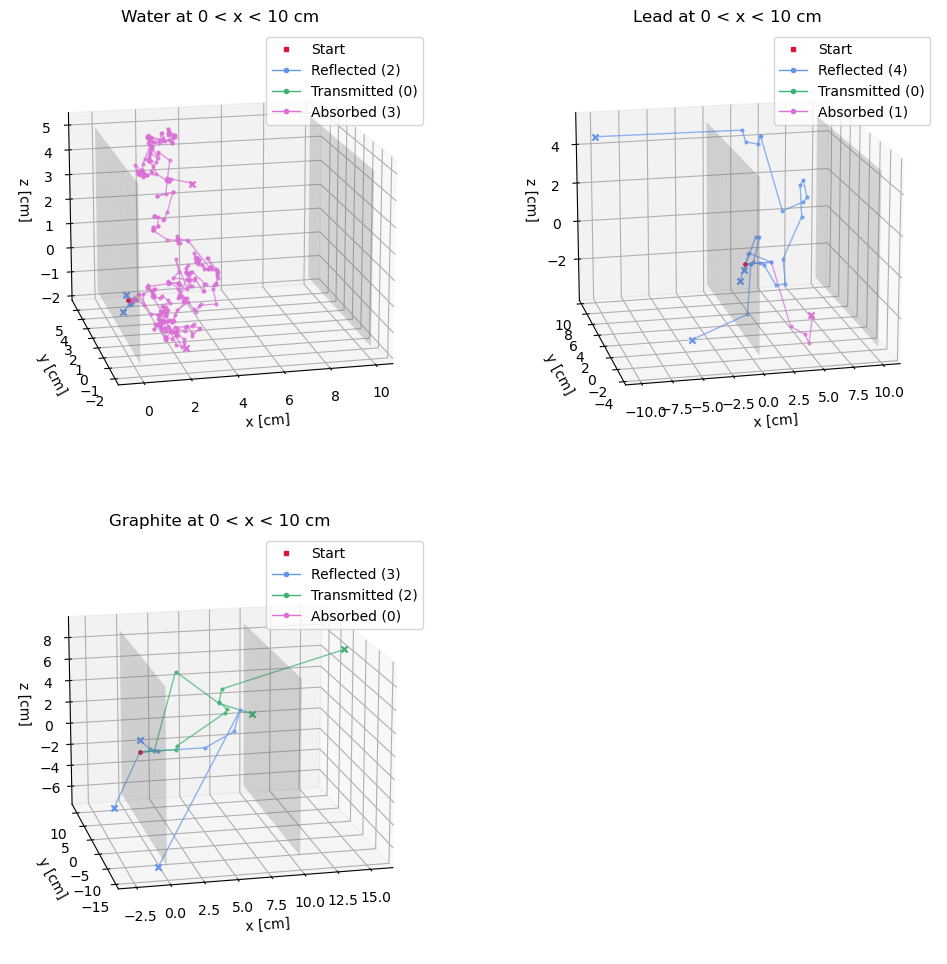

In [104]:
#np.random.seed(SEED)
length = 10           # cm width of material to pass through
color_lines = True    # if True, lines are grey and only starting and final points are coloured
one_big_plot = True   # plot on one figure or seperate figures
number_neutrons = 5   # number of neutrons per plot

if one_big_plot:
    big_figure = plt.figure(figsize=(12,12)) # produce a large figure (as its for three 3d plots)
    # iterate over all materials and increment the subplot using enumerate index
    for index,material in enumerate(materials):
        plot_all_random_walks(material, length, number_neutrons, fig=big_figure,
                              subplot=221+index, color_line=color_lines)
else: # plot all the materials on seperate figures
    for index,material in enumerate(materials):
        plot_all_random_walks(material, length, number_neutrons, figsize=FIGSIZE_3D,
                              color_line=color_lines)
plt.show()

If this small number of neutrons is represntative (and it is, looking at the gross rates below in the follwing seciton) then we see that water has the smallest mean free path, and a high likelyhood of absorption, lead has a longer mean free path with a smaller absorption probability, and graphite has the a similar mean free path but with a transmitted neutron, suggesting an even lower absorption probability.

### Quantifying the scattering processes

When only counts of absorbed, transmitted and reflected ($N_A$,  $N_T$,  $N_R$) neutrons need to be made, following the path of each particle only slows the process down. The function below returns these values for $N$ neutrons in a $10~$cm deep slab by counting the number of killed neutrons at each step. The rate for each process can be calculated by dividing specific counts by the total number of neutrons $N$. The uncertainty on each rate can be found by running the simulation multiple times, then dividing the standard deviation of a process by its mean. This allows for physical significance in the errors, since large statistical errors are propagated (as opposed to dividing by the number of neutrons which would give tiny errors for processes with standard deviations of similar size to their means - thus drowining out the statistically large errors)

In [105]:
def neutron_counts(material, size=None, length=10):
    """
    for *size* number of neutrons, the number of reflected, transmitted and 
    absorbed neutrons are returned. for some material instance of length

    Parameters
    ----------
    material : class '__main__.Material'
        an instance of the Material class.
    size : int, optional
        the number of simulated neutrons. The default is None.
    length : float, optional
        the thickness of the material in the x direction that the neutron is
        travelling through in cm. The default is 10.
    Returns
    -------
    dict 
        dictioanry with keys 
            'r_t_a' - an array of number of reflected, transmitted, absorbed neutrons
            'material' - the name of the material (as appears in the class)

    """
    # extract mean free path and produce exponential distribution
    mean_free_path = material.mean_free_total
    exponential = ExponentialDistribution(mean_free_path)
    
    number_neutrons = size  # initial number of neutrons
    n_r, n_t, n_a = 0,0,0   # set numbers for reflected, transmitted, absorbed
    
    # produce an array for the xyz for each neutron
    r = np.zeros(shape=(number_neutrons,3))
    
    # and take initial x directed exponentially distributed step
    r[:,0] = exponential.sample(number_neutrons) 
    
    while number_neutrons > 0:
        # check which neutrons were reflected and remove them
        reflected = np.nonzero(r[:,0]<0)[0] # if x < 0 
        r = np.delete(r, reflected, axis=0)
       
        # check which neutrons were transmitted and remove them
        transmitted = np.nonzero(r[:,0]>length)[0] # if x > length (of slab)
        r = np.delete(r, transmitted, axis=0)
        
        # check which neutrons were absorbed and remove them
        # generate uniform random for all neutrons
        uniform_rands = np.random.uniform(size=len(r[:,0]))
        # if any of these random numbers are below absorb probability: kill neutron
        absorbed = np.nonzero(uniform_rands < material.probability_absorb)[0]
        r = np.delete(r, absorbed, axis=0)
        
        
        # update killed numbers
        n_r += len(reflected)
        n_t += len(transmitted)
        n_a += len(absorbed)
                   
        # update number of neutrons remaining
        number_neutrons = size - (n_r + n_t + n_a)
        
        # make an exponentially distributed step and add to remaining neutrons
        r+= exponential_step(mean_free_path, size=len(r[:,0])).transpose()
    # return the numbers of neutrons reflected, transmitted and absorbed
    return{'r_t_a':np.array([n_r, n_t, n_a]), 'material':material.material}

In [106]:
def simulate_neutrons(materials=materials, number_neutrons=10_000, number_runs=10,
                      length=10, print_runtime=0):
    """
    runs neutron_counts function *number_runs* times for *number_neutrons* number
    of neutrons and outputs a dictionary with material names to an array of 
    every reflected/transmitted/absorbed counts, for some length of material

    Parameters
    ----------
    materials : array of class '__main__.Material' instances, optional
        the array containing the instances of material class. The default is materials.
    number_neutrons : int, optional
        how many neutrons simulated every run for every material. The default is 10_000.
    number_runs : int, optional
        number of runs for each material. The default is 10.
    length : float, optional
        the thickness of material to travel through in cm, default is 10 cm.
    print_runtime : bool, optional
        prints the runtime for each run.
        
    Returns
    -------
    material_runs : dictionary
        dictionary with material.material (material name) keys to a (number_runs, 3)
        size array containing all the neutron count info for that material
        (reflection, transmission, absorption)
    dictionary
        a dictionary contating info about neutrons, such as number of neutrons 
        and number of runs for each material.
    """
    if print_runtime:
        start_count_neutrons = timer.time()  # start timer
        #print('running...')

    material_runs = {}  # initialise output dictionary
    for material in materials:
        # need a 3 column array to vstack refle transmi absorb numbers
        r_t_a = np.zeros(3)
        for i in range(number_runs):
            out = neutron_counts(material, size=number_neutrons, length=length)  # get the output
            r_t_a = np.vstack((r_t_a, out['r_t_a']))  # vstack this output
        r_t_a = np.delete(r_t_a, 0, 0)  # delete the top row of 0s
        material_runs[f'{material.material}'] = r_t_a  # populate dictionary
    if print_runtime:
        print(f'runtime: {timer.time() - start_count_neutrons:.5f} s')
    return material_runs, {'number_neutrons':number_neutrons, 'number_runs':number_runs, 'length':length}

Run simulation and print means and errors of number/percent of neutrons transmitted, absorbed and reflected.

In [107]:
number_neutrons = 10_000
number_runs = 10
# run simulation and feed output into the function below for printing/processing
simulation_out, neutron_info = simulate_neutrons(materials, number_neutrons, number_runs)
    
def result_mean_and_error(simulation_out, neutron_info, print_result=1):
    """
    takes the output from simulate neutrons and returns the means and standard
    deviations of each process for each material. if print_result is true then
    also outputs to terminal to 1 decimal place

    Parameters
    ----------
    simulation_out : dictionary
        the dictioanry output from simulate_neutrons(), containts the key/value
        material / rundata information.
    neutron_info : dictionary
        dictionary with infomation about the number of neutrons, number of runs, 
        length of material.
    print_result : bool, optional
        if true prints various mean and std values calculated to terminal. 
        The default is 1.

    Returns
    -------
    means_dict : dictionary
        dictionary with material name keys and mean/std values. also constins
        number of neutrons, number of runs, length of material.

    """
    means_dict = {}
    for key,value in simulation_out.items():
        # calculate mean and standard deviation
        mean = np.mean(value, axis=0)
        std = np.std(value, axis=0)
        
        # add these values to the dictionary, with the key being material.material
        means_dict[f'{key}'] = np.vstack((mean, std))
        if print_result:
            print(f'{key}'.center(42, "-"))
            print(f'Transmission through{length:3g} cm of {key}:')
            print(42*'-')
            print(f'Thickness:            {length:.3g} cm')
            print(f'Neutrons per Run:     {neutron_info["number_neutrons"]}')
            print(f'Number of Runs:       {neutron_info["number_runs"]}')
            print(f'Neutrons Reflected:   {mean[0]:.0f} ± {std[0]:.0f}')
            print(f'Neutrons Absorbed:    {mean[2]:.0f} ± {std[2]:.0f}')
            print(f'Neutrons Transmitted: {mean[1]:.0f} ± {std[1]:.0f}\n')
            # define error as std/mean for physically significant errors
            print(f'Percent Reflected:    {mean[0]/neutron_info["number_neutrons"]*100:.2f}'
                  f' ± {std[0]/mean[0]*100:.2f} %')
            print(f'Percent Absorbed:     {mean[2]/neutron_info["number_neutrons"]*100:.2f}'
                  f' ± {std[2]/mean[2]*100:.2f} %')
            print(f'Percent Transmitted:  {mean[1]/neutron_info["number_neutrons"]*100:.2f}'
                  f' ± {std[1]/mean[1]*100:.2f} %\n')


    means_dict.update(neutron_info) # adds the number_neutrons, number_runs, length keys.

    return means_dict
mean_error_result = result_mean_and_error(simulation_out, neutron_info, print_result=1)

------------------Water-------------------
Transmission through 10 cm of Water:
------------------------------------------
Thickness:            10 cm
Neutrons per Run:     10000
Number of Runs:       10
Neutrons Reflected:   7965 ± 46
Neutrons Absorbed:    2003 ± 43
Neutrons Transmitted: 33 ± 5

Percent Reflected:    79.65 ± 0.58 %
Percent Absorbed:     20.03 ± 2.14 %
Percent Transmitted:  0.33 ± 16.36 %

-------------------Lead-------------------
Transmission through 10 cm of Lead:
------------------------------------------
Thickness:            10 cm
Neutrons per Run:     10000
Number of Runs:       10
Neutrons Reflected:   6173 ± 30
Neutrons Absorbed:    1016 ± 33
Neutrons Transmitted: 2811 ± 24

Percent Reflected:    61.73 ± 0.49 %
Percent Absorbed:     10.16 ± 3.26 %
Percent Transmitted:  28.11 ± 0.84 %

-----------------Graphite-----------------
Transmission through 10 cm of Graphite:
------------------------------------------
Thickness:            10 cm
Neutrons per Run:     10

So the lowest values such as water transmission or graphite absorbtion have significantly large errors due to the fact that such a low number of neutons are killed by the respective methods. The information is also represented on a pie chart, which is easier visulaised.

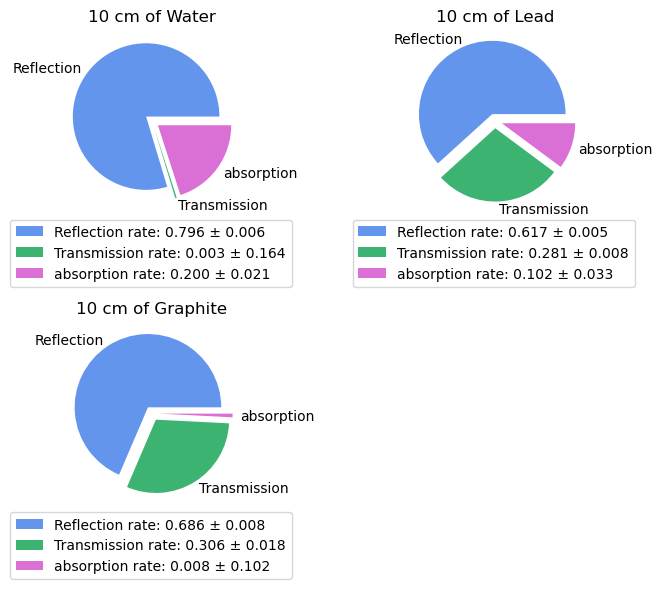

In [108]:
def pie_chart_processes(materials, mean_values_dictionary, figsize=FIGSIZE):
    """
    makes a figure with all material pie charts transmission,rflection, absorption
    amounts.

    Parameters
    ----------
    materials : array of class '__main__.Material' instances, optional
        the array containing the instances of material class. The default is materials.
    mean_values_dictionary : dictionary
        output of result_mean_and_error() function..
    figsize : tuple of floats
        the figure size (xwidth, ywidth)

    Returns
    -------
    None.

    """
    # make figure
    fig= plt.figure(figsize=figsize)
    # extract number of neutrons
    number_neutrons = mean_values_dictionary["number_neutrons"]
    # plot pie chart for each material on the one figure
    for index,material in enumerate(materials):
        # extract mean value and errors (in terms of neutrons)
        r_t_a = mean_values_dictionary[material.material]
        sizes = r_t_a[0] # values of the pie slices
        
        # plot this on the figure
        axes = fig.add_subplot(221+index)
        axes.set_title(f'{mean_values_dictionary["length"]:.3g} cm of {material.material}')
        
        # label the processes 
        labels = ['Reflection','Transmission','absorption']
        colors = ['cornflowerblue','mediumseagreen', 'orchid']
        
        # draw pie chart and make it explode
        patches, _= axes.pie(sizes, labels=labels, explode=tuple([0.1] * len(labels)),startangle=0, 
                             colors=colors)

        # lables will go on
        custom_labels = [f'Reflection rate: {r_t_a[0][0]/number_neutrons:.3f} ± {r_t_a[1][0]/r_t_a[0][0]:.3f}', 
                         f'Transmission rate: {r_t_a[0][1]/number_neutrons:.3f} ± {r_t_a[1][1]/r_t_a[0][1]:.3f}', 
                         f'absorption rate: {r_t_a[0][2]/number_neutrons:.3f} ± {r_t_a[1][2]/r_t_a[0][2]:.3f}']
        axes.legend(patches, custom_labels, bbox_to_anchor=(1.3, 0))
        plt.tight_layout()
pie_chart_processes(materials,mean_error_result, figsize=(7,6))

So water reflects the most, then graphite, which is closely followed by lead. water transmits the least while lead and graphite both let a similar number transmit - this reflects the fact that the total mean free path for water is much smaller than the other two. Finally, graphite absorbs significantly less than the other materials, which is consistent with what is expected. 

##### Plotting Variations in neutron transmission, reflection, and absorption rates against slab thickness for all three materials.

To plot the variation in each process as a function of length of material the function below is employed. This function uses the previously defined simulate_neutrons and result_mean_and_error functions and a for loop to generate the result for varying lengths from 1 to 20 cm, in 1 cm increments.

In [109]:
def length_variation(materials, lengths= np.arange(1,21, 1),
                     number_neutrons=10_000, number_runs=3):
    """
    finds the variation in reflection transmission and absorption when changing
    length of material. Find the mean and std for *number_runs* containing 
    *number_neutrons* neutrons. returns a dictionary embedded in a dictionary, 
    the first dictionary has keys of material names and the value is a dictionary
    with values and error as keys. also there is a length array in the enclosing 
    dictionary.

    Parameters
    ----------
    materials : array of class '__main__.Material' instances, optional
        the array containing the instances of material class. The default is materials.
    lengths : array of floats, optional
        an array containting all the length values to test in cm. The default 
        is np.arange(1,21, 1).
    number_neutrons : int, optional
        how many neutrons simulated every run for every material. The default is 10_000.
    number_runs : int, optional
        number of runs for each material. The default is 3
    
    Returns
    -------
    output_dict : dictionary
        dictionary with keys:
            lengths - the array of lengths
            number_neutrons, number_runs- ints, as input to the function
            mateerial.material - dictionary containting keys:
                values: the values of reflection, transmission, absorption
                at every length
                errors: the corresponding errors on each respective value.
            

    """
    # initialise an output dictioanry and populate with useful values
    output_dict = {'lengths':lengths, 
                   'number_neutrons':number_neutrons,
                   'number_runs':number_runs}
    
    # iterate over materials
    for material in materials:
        # make arrays where the means and errors will go, need size 3 for vstack
        material_output = np.array([0,0,0])
        material_output_error = np.array([0,0,0])
        
        # now for every length
        for length in lengths:
            # run simulation at this length
            out = simulate_neutrons([material], number_neutrons, number_runs, length)
            
            # calculate the mean and std for the 3 runs
            mean_error = result_mean_and_error(out[0], out[1], print_result=0)
            
            # vstack this info to their corresponding array
            material_output = np.vstack((material_output, mean_error[material.material][0]))
            material_output_error = np.vstack((material_output_error, mean_error[material.material][1]))
        # delete the top [0,0,0] row.
        material_output = np.delete(material_output,0,0)
        material_output_error = np.delete(material_output_error,0,0)
        
        # append these values to the output dictionary under the key of the material name
        output_dict[material.material] = {'values':material_output, 'error':material_output_error}
    return output_dict

In [110]:
# call the above function and get the output
vary_length_output = length_variation(materials, lengths=np.arange(1,21, 1), 
                                      number_neutrons=10_000, 
                                      number_runs=5)

We can also plot the three processes for one material for comparison. 

In [111]:
def plot_individual_material_rates(material, output_dict,figsize=FIGSIZE, one_figure=0, rate=1, rate_ylim=0, 
                                   fig=None, axes=None, subplot=111):
    """
    plots reflection transmission and  absorption for a material
    on a figure. If rate is 1 then divides number of neutrons by total neutrons. 
    if rate_ylim is 1 then sets y limit to 0-1 when rate is 1.
 
    Parameters
    ----------
    material : instance of Material class
        an object from the material class. 
    output_dict : dictionary
        output dictionary from length_variation() function.
    index : int, optional
        0,1,2 - chooses reflection transmission or absorption. The default is 0.
    rate : bool, optional
        if true plots rate on the y axis. The default is 0.
    rate_ylim : bool, optional
        if true forces rate ylim to range from 0 to 1. The default is 0.
    figsize : tuple pair of floats, optional
        as in matplotlib documentation, figsize. The default is FIGSIZE.
    fig : matplotlib.figure.Figure, optional
        figure to put plot on, at subplot decided by 'subplot'. The default is None. 
    axes : matplotlib.axes._axes.Axes, optional
        axes to draw planes on, if not provided axes is created in function. Default is None.
    subplot : int, optional
        subplot to place figure onto when fig provided. The default is 111.
 
    Returns
    -------
    fig : matplotlib.figure.Figure
        the figure the plot was drawn onto.
    axes : matplotlib.axes._axes.Axes
        axes the plot was drawn onto.
 
    """
    
    # if no figure or axes provided, create axes and figure
    if fig == None and axes == None:
        fig = plt.figure(figsize=figsize)
        axes = fig.add_subplot(subplot)
    # if figure provided but no axes then produce an axes at subplot
    elif fig != None and axes == None:
        axes = fig.add_subplot(subplot)
    # if axes is provided, ignore the figure input, skip above code
    
    # extract values
    lengths = output_dict['lengths']
    number_neutrons  = output_dict['number_neutrons']
    number_runs = output_dict['number_runs']
    process = ['Reflection', 'Transmission', 'absorption']

    # extract neutron count and std
    values = output_dict[material.material]['values'] 
    errors =  output_dict[material.material]['error']
    
    # if plotting rate then need to divide by number neutrons
    rate_scale=1
    if rate:
        rate_scale=number_neutrons
    
    # scale y axis 
    errors_plot = errors/rate_scale 
    # strictly should be errors/values - but huge error for water
    values_plot = values/rate_scale 

    # for every process (r t a) plot scatterplot with errors
    for index,process in enumerate(process):
        axes.errorbar(lengths, values_plot[:,index], yerr=errors_plot[:,index],
                      label=process, fmt='o', ms=2, ls='-', lw=0.25)
    # add legend and lavels
    axes.legend()
    axes.set_title(fr'{material.material}, {number_neutrons} Neutrons $\times$ {number_runs} runs')
    axes.set_xlabel('Length [cm]')
    ylabel = 'Number of Neutrons'
    # if rate=True then change y axis to Fraction instead of Number
    if rate:
        ylabel = 'Fraction of Neutrons'
        # if the y axis is forced to be 0->1.. only for rate=True
        if rate_ylim:
            axes.set_ylim(0,1)
    axes.set_ylabel(ylabel)
    return fig, axes

The function below is used to make plotting easier.

In [112]:
def all_material_process(materials, output, figsize=FIGSIZE, one_figure=1, rate=0, rate_ylim=0):
    """
    plots the reflection transmission absorption counts (or rates) against length
    of for each material - but each materials rates are grouped. 
    Either on one big figure or seperately.

    Parameters
    ----------
    materials: array of instances from Material class
        list of materials. 
    output : dictionary
        output dictionary from length_variation() function.
    figsize : tuple pair of floats, optional
        as in matplotlib documentation, figsize. The default is FIGSIZE.
    one_figure : TYPE, optional
        DESCRIPTION. The default is 0.
    rate : bool, optional
        if true plots rate on the y axis. The default is 0.
    rate_ylim : bool, optional
        if true forces rate ylim to range from 0 to 1. The default is 0.

    Returns
    -------
    None.

    """
    
    # check if user wants one big figure
    if one_figure:
        fig = plt.figure(figsize=figsize) # create figure
        for i,material in enumerate(materials):
            plot_individual_material_rates(material, output, rate=rate, fig=fig, subplot=221+i, 
                                  rate_ylim=rate_ylim) # plot on different subplots
            plt.tight_layout() # tight layout to avid overlapping
    else:
        # otherwise plot all the ['Reflection', 'Transmission', 'absorption'] seperately
        for material in materials:
            plot_individual_material_rates(material, output, rate=rate,figsize=figsize, rate_ylim=rate_ylim)

Now plot the reflection, transmission and absorption for each material. Setting rate=0 plots the number of neutrons plus their standard deviations which is functionally identical to the rate=1 plot except a y axis scaling. setting one_figure=0 will plot these different subplots on seperate axis, for closer inspection.

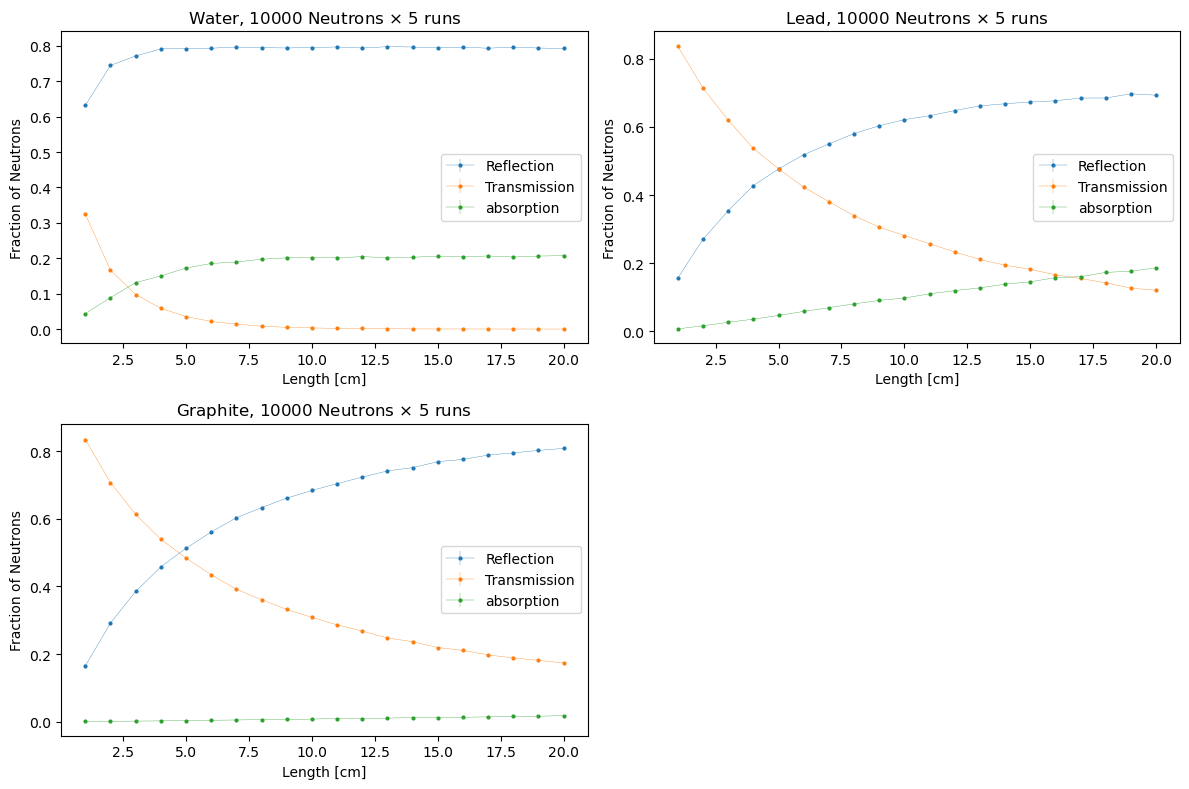

In [113]:
all_material_process(materials, vary_length_output,figsize=(12,8), one_figure=1, rate=1, rate_ylim=0)
plt.show()

As the length increases for water there is a plataue, since every neutron is reflected or absorbed before a significant number can be transmitted. Graphite and lead do not plataue due to their larger mean free paths, but given a large enough width they will eventually exhibit a similar behaviour to water. Looking at the absorbtion lines we see a linear increase for lead and graphite, this is similarly due to their mean free paths being significnant fractions of the lengths we have considered. Also, each processes (such as absorption) for different materials can be directly compared.

In [114]:
def plot_length_variation(output_dict, index = 0, rate=0, rate_ylim=0,
                          figsize=FIGSIZE, fig=None, axes=None, subplot=111):
    """
    plots either reflection(index=0) transmission(index=1) absorption (index=2)
    on a figure. If rate is 1 then divides number of neutrons by total neutrons. 
    if rate_ylim is 1 then sets y limit to 0-1 when rate is 1.

    Parameters
    ----------
    output_dict : dictionary
        output dictionary from length_variation() function.
    index : int, optional
        0,1,2 - chooses reflection transmission or absorption. The default is 0.
    rate : bool, optional
        if true plots rate on the y axis. The default is 0.
    rate_ylim : bool, optional
        if true forces rate ylim to range from 0 to 1. The default is 0.
    figsize : tuple pair of floats, optional
        as in matplotlib documentation, figsize. The default is FIGSIZE.
    fig : matplotlib.figure.Figure, optional
        figure to put plot on, at subplot decided by 'subplot'. The default is None. 
    axes : matplotlib.axes._axes.Axes, optional
        axes to draw planes on, if not provided axes is created in function. Default is None.
    subplot : int, optional
        subplot to place figure onto when fig provided. The default is 111.

    Returns
    -------
    fig : matplotlib.figure.Figure
        the figure the plot was drawn onto.
    axes : matplotlib.axes._axes.Axes
        axes the plot was drawn onto.

    """
    # if no figure or axes provided, create axes and figure
    if fig == None and axes == None:
        fig = plt.figure(figsize=figsize)
        axes = fig.add_subplot(subplot)
    # if figure provided but no axes then produce an axes at subplot
    elif fig != None and axes == None:
        axes = fig.add_subplot(subplot)
    # if axes is provided, ignore the figure input, skip above code
    
    # extract values
    lengths = output_dict['lengths']
    number_neutrons  = output_dict['number_neutrons']
    number_runs = output_dict['number_runs']
    materials = [*output_dict][3:] # know rest of the keys are material names
    
    for material in materials: # loop over material names
        # extract the values and errors associated with the material
        values = output_dict[material]['values'] 
        errors =  output_dict[material]['error']
        
        # scale y axis if rate wanted
        rate_scale=1
        if rate:
            rate_scale=number_neutrons
        values_plot = values/rate_scale
        errors_plot = errors/rate_scale
        
        # plot the value and error, index (absorption, reflection,transmission)
        # from function argument
        axes.errorbar(lengths, values_plot[:,index], yerr=errors_plot[:,index], label=material,
                      fmt='o', ms=2, ls='-', lw=0.25)
    
    # plot labeling
    axes.legend()
    process = ['Reflection', 'Transmission', 'absorption']
    axes.set_title(fr'{process[index]}, {number_neutrons} Neutrons $\times$ {number_runs} runs')
    axes.set_xlabel('Length [cm]')
    ylabel = 'Number of Neutrons'
    if rate:
        ylabel = 'Fraction of Neutrons'
        if rate_ylim:
            axes.set_ylim(0,1)
    axes.set_ylabel(ylabel)
    return fig, axes

Similarly to make plotting easier:

In [115]:
def plot_three_process(output, figsize=FIGSIZE, one_figure=0, rate=0, rate_ylim=0):
    """
    plots the reflection transmission absorption counts (or rates) against length
    of materia. Either on one big figure or seperately.

    Parameters
    ----------
    output_dict : dictionary
        output dictionary from length_variation() function.
    figsize : tuple pair of floats, optional
        as in matplotlib documentation, figsize. The default is FIGSIZE.
    one_figure : TYPE, optional
        DESCRIPTION. The default is 0.
    rate : bool, optional
        if true plots rate on the y axis. The default is 0.
    rate_ylim : bool, optional
        if true forces rate ylim to range from 0 to 1. The default is 0.

    Returns
    -------
    None.

    """
    
    # check if user wants one big figure
    if one_figure:
        fig = plt.figure(figsize=figsize) # create figure
        for i in range(3):
            plot_length_variation(output, index=i, rate=rate, fig=fig, subplot=221+i, 
                                  rate_ylim=rate_ylim) # plot on different subplots
            plt.tight_layout() # tight layout to avid overlapping
    else:
        # otherwise plot all the ['Reflection', 'Transmission', 'absorption'] seperately
        for i in range(3):
            plot_length_variation(output, index=i,rate=rate,figsize=figsize, rate_ylim=rate_ylim)

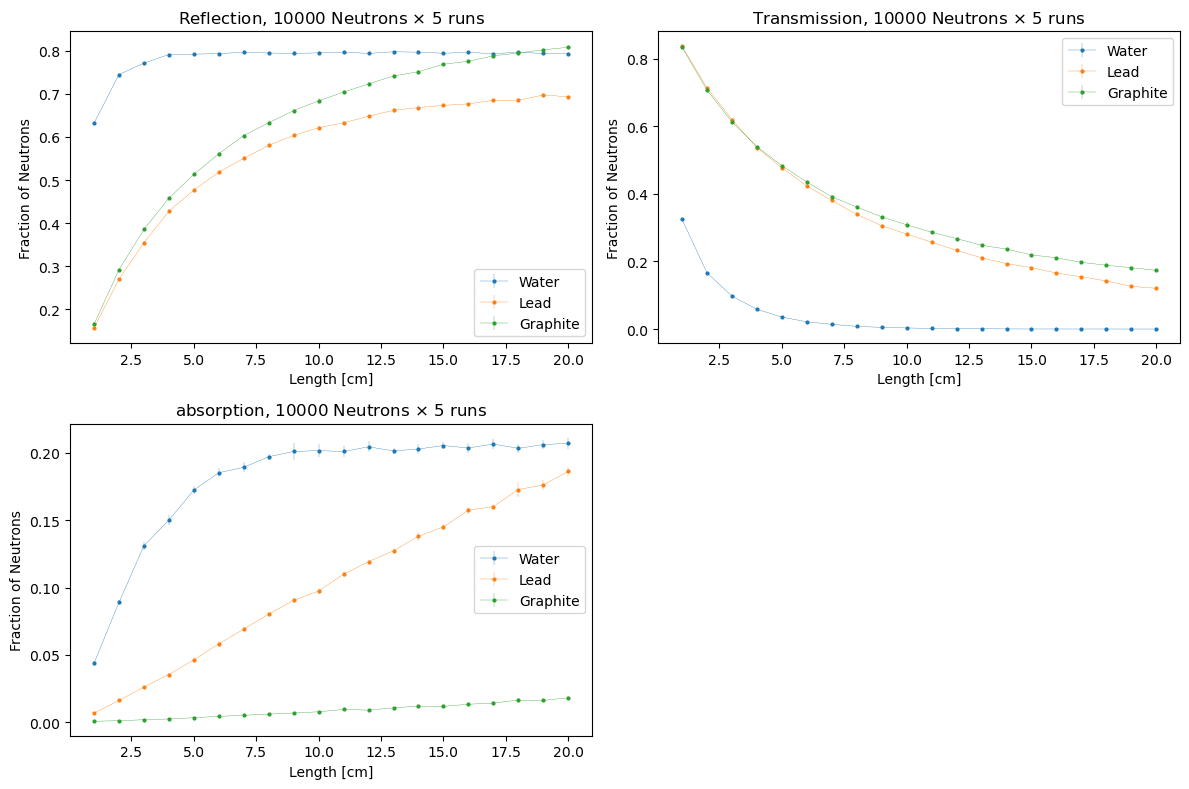

In [116]:
plot_three_process(vary_length_output,figsize=(12,8), one_figure=1, rate=1, rate_ylim=0)
plt.show()

Water dominates the absorption and reflection at lengths $< 15$ cm. As thickness increases, the fraction of reflected neutrons by graphite approach the fraction water reflects, but lead fall slightly short due to its higher transmission rate (from its higher mean free path and higher chance of absorption meaning there are more neutrons killed by absorption and more neutrons killed by transmission - thus not as many can be killed by reflection unlike graphite with its tiny absorption probability). The fraction of neutrons absorbed by graphite is by far the smallest, and like lead, as before this fraction rises linearly with width. Generally, the number of transmitted neutrons falls exponentially with length, from this we can determine an attenuation length. 
The number of Transmitted neutrons $N_T$, can be described by:
$$
N_T \propto \exp\left(-{\dfrac{L}{\lambda}}\right), \\
\therefore \ln(N_T) = -\frac{L}{\lambda} + c,
$$
where $\lambda$ is the attenutation coefficient and $c$ is some constant. Since we have data for multiple runs, the mean and standard deviation for transmission numbers can be calculated. Then the uncertainty on attenuation length can be determined from the fitting procedure by setting the weight as $N_T^{(\text{mean})}/ N_T^{(\text{std})}$ which correspond respectively to the mean and standard deviation of the transmission number (at each length). Also if each datapoint has some standard devaition associated then the uncertainty on the logged value will be the fractional error, i.e 
$$
\Delta\ln(N_T \pm \Delta N_T) = \frac{\Delta N_T}{N_T}.
$$

#### The characteristic attenuation lengths and the associated errors using transmission rates.

This function finds the attenuation coefficient using polyfit, and also plots the function produced by the fitted gradient and intercept.

In [117]:
# the thickness values with 0 transmitted neutrons are removed before fitting.
def find_attenuation(material, output_dict, figsize=FIGSIZE, fig=None, axes=None, subplot=111):
    """
    find the attenuation length, error on attenuation length, reduced chi squared, 
    and number of degrees of freedom for the transmission of neutrons through some 
    material

    Parameters
    ----------
    material : string
        the name of some material as appears in material.material.
    output_dict : dictionary
        output dictionary from length variation, contains transmission info for 
        variable length.
    figsize : tuple of floats, optional
        the figsize as in matplotlib documentation. The default is FIGSIZE.
    fig : matplotlib.figure.Figure, optional
        figure to put plot on, at subplot decided by 'subplot'. The default is None. 
    axes : matplotlib.axes._axes.Axes, optional
        axes to draw planes on, if not provided axes is created in function. Default is None.
    subplot : int, optional
        subplot to place figure onto when fig provided. The default is 111.

    Returns
    -------
    gradients_dict : dictionary
        dictionary with key of material name, and each key corresponds to an
        array with (in order):
            the gradient
            error on gradient 
            reduced chi_squared.
    fig : matplotlib.figure.Figure
        the figure the plot was drawn onto.
    axes : matplotlib.axes._axes.Axes
        axes the plot was drawn onto.


    """
    # if no figure or axes provided, create axes and figure
    if fig == None and axes == None:
        fig = plt.figure(figsize=figsize)
        axes = fig.add_subplot(subplot)
    # if figure provided but no axes then produce an axes at subplot
    elif fig != None and axes == None:
        axes = fig.add_subplot(subplot)
    # if axes is provided, ignore the figure input, skip above code
    
    # extract values from output dict
    lengths = output_dict['lengths'] # lengths array
    number_neutrons  = output_dict['number_neutrons']
    number_runs = output_dict['number_runs']
        
    # extract the values and errors associated with the material
    transmission_values = output_dict[material]['values'][:,1]
    error_values = output_dict[material]['error'][:,1]
    
    # check for zeros in both arrays, then combine with no duplicates
    zeros = np.nonzero(transmission_values<=0.0)[0]
    zeros_err = np.nonzero(error_values<=0)[0]
    all_zeros = np.unique((zeros,zeros_err)) # instead of list(set(...))
    
    # remove the zero values from length, transmission values, transmission errors
    edited_length = np.delete(lengths.copy(), all_zeros, axis=0)
    final_transmission_values = np.delete(transmission_values,all_zeros,0)
    final_transmission_errors = np.delete(error_values,all_zeros,0)
    
    # take ln of transmission values, propagate fractional error
    log_values = np.log(final_transmission_values)
    final_transmission_errors /= final_transmission_values

    # polyfit the log values, with weight of mean/std
    result = np.polyfit(edited_length, log_values, deg=1, cov=True, w=1/final_transmission_errors)
    
    # extract gradient and gradient error
    gradient = result[0][0]
    gradient_error = np.sqrt(result[1][0, 0])
    
    # plot fitted line
    x = np.linspace(min(lengths), max(lengths), 40)
    y = x*gradient + result[0][1]
    line = axes.plot(x,y, lw=0.8)
    
    # calculate reduced chi squared
    dof = len(edited_length)-2
    red_chi_square = ((np.sum(np.polyval(result[0], edited_length)-log_values)**2)
                      /dof)
    
    # plot error bar
    axes.errorbar(edited_length, log_values, yerr=final_transmission_errors, 
                            label=(f'{material} 'r'$\frac{1}{\lambda}=$'
                                   fr'{-gradient:.4f} $\pm$ {gradient_error:.4f} cm$^{-1}$'), 
                            fmt='o', ms=2, elinewidth=0.5, capsize=2,
                            capthick=0.3, color=line[0].get_color())

    gradients_dict = {} # this dictionary will hold the gradient, error, chi_sqr, dof
    grad_err = np.c_[-gradient, gradient_error, red_chi_square, dof]
    gradients_dict[material] = grad_err
    
    # annotate plot then return gradient dict, figure and axes    
    axes.legend()
    axes.set_title(fr'Transmission {material}, {number_neutrons} Neutrons'
                   fr' $\times$ {number_runs} runs, $\chi^2_R=${red_chi_square:.4f}')
    axes.set_xlabel('Length [cm]')
    axes.set_ylabel(r'$\ln(N_T)$')
    return gradients_dict, fig,axes

Similarly to make plotting easier, the function below takes the above functions output and gives the user some choice on how the data is to be respresnted.

In [118]:
def plot_all_attenuation(output_dict, figsize=FIGSIZE, one_axes=0, one_figure=1):
    """
    plots the logged attenuation for all materials analysed. either on 
    one axes, on one figure with multiple subplots, or on their own axes (if both 
    one_axes=0 and one_figure=0).

    Parameters
    ----------
    output_dict : dictionary
         output dictionary from length variation, contains transmission info for 
         variable length.
    figsize : tuple of floats, optional
        the figsize as in matplotlib documentation. The default is FIGSIZE.
    one_axes : bool, optional
        if true, plots all lines on one axes. The default is 0.
    one_figure : bool, optional
        if true plots 2x2 figure, with subplots populated with induvidual graphs.
        The default is 1.

    Returns
    -------
    gradients_dict : dictionary
        dictionary with keys of material names, and each key corresponds to an
        array with (in order):
            the gradient
            error on gradient 
            reduced chi_squared.

    """
    # extract material names
    materials = [*output_dict][3:]
    
    # plotting multiple subplots on one figure
    if one_figure:
        fig=plt.figure(figsize=figsize)
        gradients_dict = {}
        for index,material in enumerate(materials):
            grads,_,_ = find_attenuation(material, output_dict, fig=fig, subplot=221+index)
            gradients_dict.update(grads)
        plt.tight_layout()
        return gradients_dict
    
    # plotting multiple lines on one axes
    if one_axes:
        axes=plt.figure(figsize=figsize).add_subplot(111)
        gradients_dict = {}
        for material in materials:
            grads,_,axes = find_attenuation(material, output_dict, axes=axes)
            gradients_dict.update(grads)
        axes.set_title(fr'Transmission, {output_dict["number_neutrons"]} Neutrons'
                   fr' $\times$ {output_dict["number_runs"]} runs')
        return gradients_dict
    
    # plotting multiple figures otherwise
    gradients_dict = {}
    for material in materials:
        grads,_,_ = find_attenuation(material, output_dict, figsize=figsize)
        gradients_dict.update(grads)
    return gradients_dict

This function simply prints values to the cell output.

In [119]:
def print_attenuation(gradients_dict, output_dict):
    """
    prints the results of plot_all_attenuation

    Parameters
    ----------
    gradients_dict : dictionary
        dictionary from plot_all_attenuation() with keys of material names, and 
        each key corresponds to an array with (in order):
            the gradient
            error on gradient 
            reduced chi_squared..
    output_dict : dictionary
        output_dict : dictionary
            output dictionary from length_variation(), contains transmission info for 
            variable length.

    Returns
    -------
    None.

    """
    materials = [*gradients_dict]
    print(42*'-')
    print('Attenuation length for transmission.')
    print(42*'-')
    print(f'Lengths:              {min(output_dict["lengths"])} to {max(output_dict["lengths"])} cm')
    print(f'Datapoints            {len(output_dict["lengths"])}')
    print(f'Neutrons per Run:     {output_dict["number_neutrons"]}')
    print(f'Number of Runs:       {output_dict["number_runs"]}\n')
    for material in materials:
        print(f'{material}'.center(42, "-"))
        print(f'Gradient:             {-gradients_dict[material][0][0]:.4f} ± '
              f'{gradients_dict[material][0][1]:.4f} cm^-1')
        attenuation_length=1/gradients_dict[material][0][0]
        attenuation_error=((1/gradients_dict[material][0][0])
                           *(gradients_dict[material][0][1]/gradients_dict[material][0][0]))
        print(f'Attenuation length:   {attenuation_length:.2f} ± {attenuation_error:.2f} cm')
        print(f'Reduced Chi-Squared:  {gradients_dict[material][0][2]:.4f}')
        print(f'Degrees of freedom:   {gradients_dict[material][0][3]:.0f}\n')

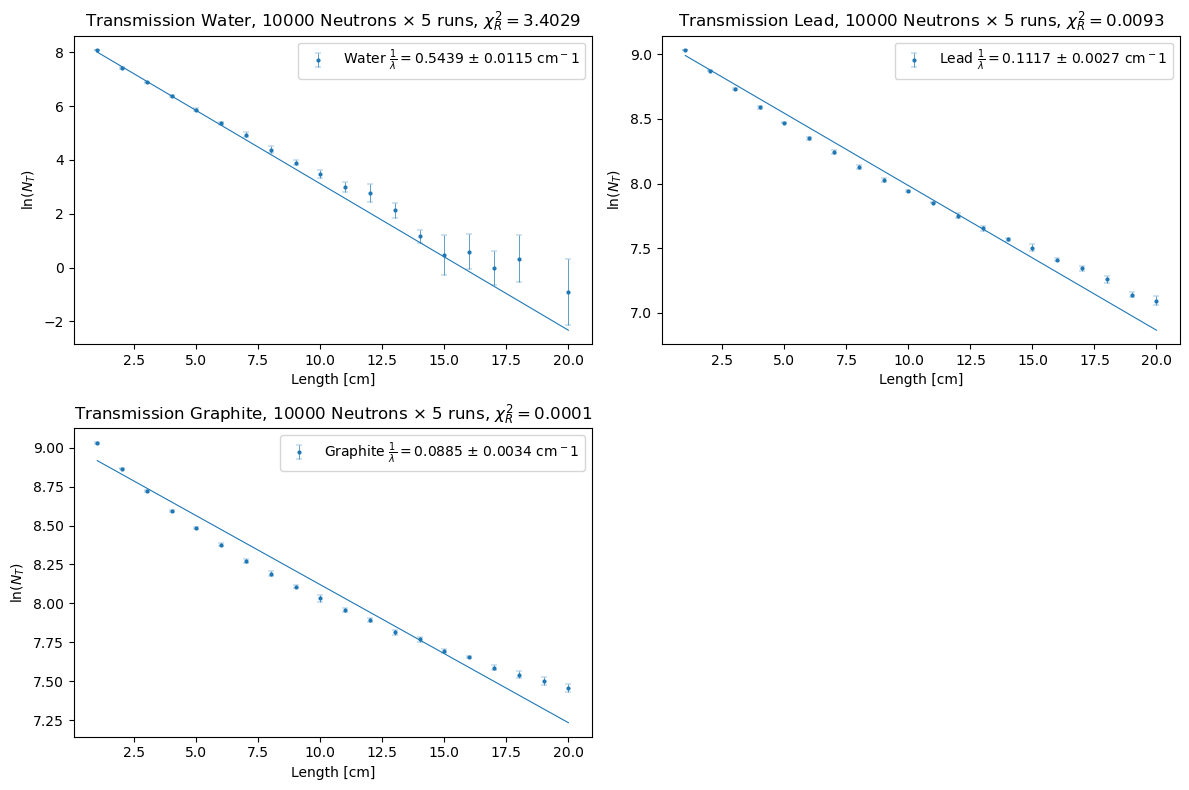

In [120]:
# run and get the gradients output
grads = plot_all_attenuation(vary_length_output,figsize=(12,8), one_axes=0, one_figure=1)
plt.show()

also, its useful to see the graphs superimposed on one axis - to get a sense of relative gradients.

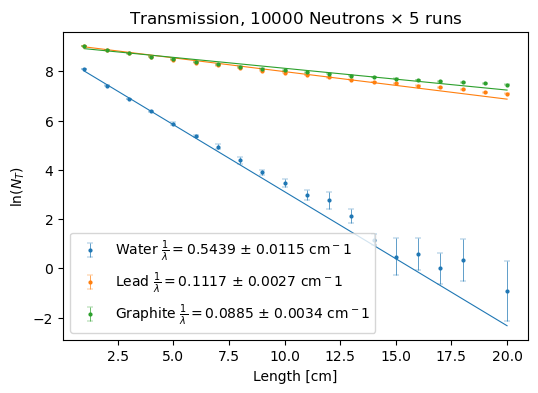

In [121]:
# replotting the same above, so the output is ignored as its the same 
plot_all_attenuation(vary_length_output, one_axes=1, one_figure=0);
plt.show()

In [122]:
# now print the result from the above runs.
print_attenuation(grads, vary_length_output)

------------------------------------------
Attenuation length for transmission.
------------------------------------------
Lengths:              1 to 20 cm
Datapoints            20
Neutrons per Run:     10000
Number of Runs:       5

------------------Water-------------------
Gradient:             -0.5439 ± 0.0115 cm^-1
Attenuation length:   1.84 ± 0.04 cm
Reduced Chi-Squared:  3.4029
Degrees of freedom:   17

-------------------Lead-------------------
Gradient:             -0.1117 ± 0.0027 cm^-1
Attenuation length:   8.95 ± 0.21 cm
Reduced Chi-Squared:  0.0093
Degrees of freedom:   18

-----------------Graphite-----------------
Gradient:             -0.0885 ± 0.0034 cm^-1
Attenuation length:   11.30 ± 0.44 cm
Reduced Chi-Squared:  0.0001
Degrees of freedom:   18



The material with the highest total attenuation length is graphite. Despite graphites larger total mean free path, this result is expected due to graphites lower absorption probability. Neutrons in graphite are more likely to only be killed by reflection or transmission, hence the larger attenuation length.
Water has the lowest attenuation length, due to its large absorption probability and small total mean free path - requiring many more scattering events to pass through material of any length.

Looking at the $\chi_R^2$ values, its clear that due to the small values for lead and graphite and non linear looking nature of the plots above that the transmission rates for these materials do not decay exactly exponentially with distance of material, this is somewhat refelcted in the larger errors assigned to the attenuation lengths of lead and graphite. This is not the case for water which seems to fit the model better than the other two materials. However, the $\chi_R^2$ for water is still not fully acceptable.

### Phase 4 - Extras, Woodcock method to compute the fraction of neutrons transmitted through two adjacent slabs composed of different materials each with a thickness of 𝟏𝟎 𝒄𝒎.

The woodcock method for two different materials is coded below. Before that a way to produce xyz values given a radius, aziumuthal angle phi and polar angle theta is needed.

In [123]:
def woodcock_direction(radius,phi, theta):
    """
    converts two angles and radius into xyz coordinates

    Parameters
    ----------
    radius : float, or array of floats
        the radius of the steps.
    phi : float or array of floats
        the aziumuthal angle (0-2π).
    theta : float or array of floats
        The polar angle (0-π).

    Returns
    -------
    numpy array of floats
        the xyz coordinates of the spherical step.

    """
    x = radius*np.sin(theta)*np.cos(phi)
    y = radius*np.sin(theta)*np.sin(phi)
    z = radius*np.cos(theta)
    return np.array([x, y, z])

Also to simplify the woodcock method this section of the code has been put into a seperate function, simply generating random $\theta$ and $\phi$ values as previously described.

In [124]:
def random_theta_phi(size=None):
    """
    generates a 2d array with *size* rows [theta, phi] where theta is 0 -π and 
    phi is 0-2π but using the arccos cdf.

    Parameters
    ----------
    size : int, optional
        the number of rows to generate. The default is None.

    Returns
    -------
    numpy array of floats
        the theta phi array.

    """
    theta = np.arccos(1-2*np.random.uniform(size=size))
    phi = np.random.uniform(low=0, high=2*np.pi, size=size)
    return np.array([theta,phi]).transpose()

Now the woodcock method: for (in order) material_1 of length_1 before material_2 of length_2.

In [125]:
def woodcock_method(material_1, material_2, length_1, length_2, size=None):
    """
    woodcock method for two adjacent slabs. *size* neutrons simulated 
    entering a composite system of two materials  returns the number of 
    transmitted, reflected and absorbed neutrons.

    Parameters
    ----------
    material_1 : class '__main__.Material'
        the first material (particles start here).
    material_2 : class '__main__.Material'
        the second material, adjacent to first material with no gap.
    length_1 : float
        the thickness of material_1 in cm.
    length_2 : float
        the thickness of material_2 in cm.
    size : TYPE, optional
        DESCRIPTION. The default is None.

    Returns
    -------
    dict
        dictioanry with keys 
            'r_t_a' - an array of number of reflected, transmitted, absorbed neutrons
            'materials' - the material class instance.
            'lengths' - the respective lengths of material_1 and material_2 

    """
    
    number_neutrons = size  # initial number of neutrons
    n_r, n_t, n_a = 0, 0, 0   # set numbers for reflected, transmitted, absorbed
        
    # determine minimum total mean free path of the two layers
    materials_ = [material_1,material_2]
    major_sigma_loc = np.argmax([material.cross_total_macro for material in materials_])
    major_sigma_material = materials_[major_sigma_loc]
    major_sigma = major_sigma_material.cross_total_macro

    # produce exponential distribution
    exponential = ExponentialDistribution(major_sigma_material.mean_free_total)
    
    r = np.zeros(shape=(number_neutrons, 3))     # produce an array for the xyz for each neutron
    theta_phi = np.zeros((number_neutrons,2))    # produce theta and phi direction array
    
    # initial step and direciton
    r[:,0] = exponential.sample(number_neutrons) # move neutrons along x
    theta_phi[:,0] = np.pi/2

    while number_neutrons>0:
        # check which neutrons were reflected and remove them from position and direction array
        reflected = np.nonzero(r[:,0]<0)[0] # if x < 0 
        r = np.delete(r, reflected, axis=0)
        theta_phi = np.delete(theta_phi, reflected, axis=0)
       
        # check which neutrons were transmitted and remove them
        transmitted = np.nonzero(r[:,0]>length_1+length_2)[0] # if x > length (of slab)
        r = np.delete(r, transmitted, axis=0)
        theta_phi = np.delete(theta_phi, transmitted, axis=0)

        # will check which particles will take non fictitious steps, thus direction change
        fictitious_check = np.random.uniform(size=len(r[:,0]))
        
        # check for non fictitous steps, otherwise if fictitous dont touch it
        # of the particles in material 1 
        in_material_1 = np.nonzero(r[:,0] < length_1)[0] 
        # calculate the threshold for fictious step
        material_1_threshold = material_1.cross_total_macro/major_sigma
        # check where the random numbers are below this threshold
        non_fictitious_step_1 = np.nonzero(fictitious_check[in_material_1] < material_1_threshold)[0]
        # update direction for these particles 
        theta_phi[non_fictitious_step_1] = random_theta_phi(len(non_fictitious_step_1))
        # check if these particles will be absorbed
        absorb_1_rands = np.random.uniform(size=len(non_fictitious_step_1))
        absorbed_1 = np.nonzero(absorb_1_rands < material_1.probability_absorb)[0]
        # delete absorbed particles from the arrays
        r = np.delete(r, absorbed_1, axis=0)
        theta_phi = np.delete(theta_phi, absorbed_1, axis=0)

        # of the particles in material 2 
        in_material_2 = np.nonzero(r[:,0] > length_1)[0]
        # calculate the threshold for fictious step
        material_2_threshold = material_2.cross_total_macro/major_sigma
        # check which particles arent taking fictitous steps
        non_fictitious_step_2 = np.nonzero(fictitious_check[in_material_2] < material_2_threshold)[0]
        # update their direction
        theta_phi[non_fictitious_step_2] = random_theta_phi(len(non_fictitious_step_2))
        # check which particles will be absorbed
        absorb_2_rands = np.random.uniform(size=len(non_fictitious_step_2))
        absorbed_2 = np.nonzero(absorb_2_rands < material_2.probability_absorb)[0]
        # remove absorbed particles
        r = np.delete(r, absorbed_2, axis=0)
        theta_phi = np.delete(theta_phi, absorbed_2, axis=0)

        # update the respective counts
        n_r += len(reflected)
        n_t += len(transmitted)
        n_a += (len(absorbed_1) + len(absorbed_2))
        number_neutrons = size - (n_r + n_t + n_a) # also update the neutron number
        
        # now get some exponentially distributed numbers for the radii
        radii = exponential.sample(len(r[:,0]))
        # take steps for all particles, direction may or may not have changed
        r += woodcock_direction(radii, theta_phi[:,1], theta_phi[:,0]).transpose()
        
    # return the important information
    return {'r_t_a': np.array([n_r, n_t, n_a]), 'material': [material_1, material_2], 'length':[length_1,length_2],
            'number_neutrons':size}

To get averages for errors we need to run the simulation multiple times, as before.

In [126]:
def woodcock_average(material_1, material_2, length_1, length_2, size=None, runs=3):
    """
    calculates the mean and std of woodcock method

    Parameters
    ----------
    material_1 : class '__main__.Material'
        the first material (particles start here).
    material_2 : class '__main__.Material'
        the second material, adjacent to first material with no gap.
    length_1 : float
        the thickness of material_1 in cm.
    length_2 : float
        the thickness of material_2 in cm.
    size : TYPE, optional
         the number of runs. The default is None.

    runs : TYPE, optional
        DESCRIPTION. The default is 3.

    Returns
    -------
    dictionary
        with same keys as before plus a mean and error key.

    """
    r_t_a = woodcock_method(material_1, material_2, length_1, length_2, size)["r_t_a"]
    for i in range(runs):
        r_t_a = np.vstack((r_t_a, woodcock_method(material_1, material_2, length_1, length_2, size)["r_t_a"]))
    mean = np.mean(r_t_a, axis=0)
    error = np.std(r_t_a, axis=0)
    return {'r_t_a': r_t_a, 'material': [material_1, material_2], 'length':[length_1,length_2],
            'number_neutrons':size, 'mean':mean, 'error':error}


Defining a function to print the results and produce pie charts for easier comparison:

In [127]:
def print_woodcock(woodcock_out):
    """
    prints important values from the woodcock average

    Parameters
    ----------
    woodcock_out : dictionary
        output dictionary form the woodcock_average function.

    Returns
    -------
    None.

    """
    number_neutrons = woodcock_out["number_neutrons"]
    rta = woodcock_out["mean"]
    error = woodcock_out['error']
    material, lengths = woodcock_out['material'], woodcock_out['length']
    material_1,length_1 = material[0].material , lengths[0]
    material_2, length_2 = material[1].material, lengths[1]
    
    reflected_fraction = rta[0]/number_neutrons
    transmitted_fraction = rta[1]/number_neutrons
    absorbed_fraction = rta[2]/number_neutrons
    
    reflected_fraction_err = error[0]/rta[0]
    transmitted_fraction_err = error[1]/rta[1]
    absorbed_fraction_err = error[2]/rta[2]
    print(f'materials: {material_1}, {material_2}')
    print(f'respective lengths: {length_1}, {length_2} cm')
    print(42*'-')
    print(f'Fraction of reflected neutrons is:    {reflected_fraction:.3f} ± {reflected_fraction_err:.3f}')    
    print(f'Fraction of transmitted neutrons is:  {transmitted_fraction:.3f} ± {transmitted_fraction_err:.3f}')    
    print(f'Fraction of absorbed neutrons is:     {absorbed_fraction:.3f} ± {absorbed_fraction_err:.3f}')  

In [128]:
def pie_chart_woodcock(woodcock_out, figsize=FIGSIZE, fig=None, axes=None, subplot=111):
    """
    plots pie chart of information from the woodcock method

    Parameters
    ----------
    woodcock_out : dictionary
        dictionary output from woodcock_method function.
    figsize : (float,float), optional
        size of the figure. The default is FIGSIZE.
    fig : matplotlib figure, optional
        the figure to draw plot on. The default is None.
    axes : matplotlin axes, optional
        the axes to draw plot on. The default is None.
    subplot : integer, optional
        three digit integer. The default is 111.

    Returns
    -------
    fig : matplotlib figure
        the figure tohat was used
    axes : matplotlin axes
        the axes the plot is on

    """
    # if no figure or axes provided, create axes and figure
    if fig == None and axes == None:
        fig = plt.figure(figsize=figsize)
        axes = fig.add_subplot(subplot)
    # if figure provided but no axes then produce an axes at subplot
    elif fig != None and axes == None:
        axes = fig.add_subplot(subplot)
    # if axes is provided, ignore the figure input, skip above code
    
    # plot pie chart for each material on the one figure
    # extract mean value and errors (in terms of neutrons)
    rta = woodcock_out["mean"]
    error = woodcock_out["error"]
    number_neutrons = woodcock_out["number_neutrons"]
    material, lengths = woodcock_out['material'], woodcock_out['length']
    material_1,length_1 = material[0].material , lengths[0]
    material_2, length_2 = material[1].material, lengths[1]
    sizes = rta # values of the pie slices

    # plot this on the figure
    axes.set_title((f'materials: {material_1}, {material_2}\n'
                    f'respective lengths: {length_1}, {length_2} cm'))

    # label the processes 
    labels = ['Reflection','Transmission','absorption']
    colors = ['cornflowerblue','mediumseagreen', 'orchid']

    # draw pie chart and make it explode
    patches, _= axes.pie(sizes, labels=labels, explode=tuple([0.1] * len(labels)),startangle=0, 
                         colors=colors)

    # lables will go on
    custom_labels = [f'Reflection rate: {rta[0]/number_neutrons:.3f}± {error[0]/rta[0]:.3f}', 
                     f'Transmission rate: {rta[1]/number_neutrons:.3f}± {error[1]/rta[1]:.3f}', 
                     f'absorption rate: {rta[2]/number_neutrons:.3f}± {error[2]/rta[2]:.3f}']
    axes.legend(patches, custom_labels, bbox_to_anchor=(1.3, 0))
    plt.tight_layout()
    return fig, axes

Now we can simulate 10 cm of lead adjacent to 10cm of water ,the user can change the inputs in the cell below:

In [129]:
# run the woodcock method for 10cm of lead then 10cm of water
material_1,material_2 = lead, water
length_1, length_2 = 10, 10 # cm
number_neutrons = 10_000
woodcock_out = woodcock_average(material_1, material_2, length_1, length_2, 
                                size=number_neutrons, runs=3)
print_woodcock(woodcock_out) 

materials: Lead, Water
respective lengths: 10, 10 cm
------------------------------------------
Fraction of reflected neutrons is:    0.597 ± 0.013
Fraction of transmitted neutrons is:  0.122 ± 0.029
Fraction of absorbed neutrons is:     0.280 ± 0.017


So we see porperties of both materials in these numbers, notably the higher absorbtion value, which if it was lead alone would be smaller. To check for the validity of these results, we can use the woodcock method to simulate systems identical to those above and compare the values we obtain. This can be done by inputting a single material as both material inputs, of 5 cm length. Alternatively, by producing a vacuume dictionary and using that as a material with 10 cm of some other material, we can similarly simulate a similar system.

In [130]:
# the vaccume dictionary
vacuume_dict = {'material': 'Vacuume',
             'cross_absorption_micro': 0, 'cross_scattering_micro': 0,
             'density': 0, 'molar_mass': 0}
vacuume = Material(**vacuume_dict)

10 cm of water, in the form of 5 cm of water and 5 cm of water:

In [131]:
# water and water of 5 cm and 5 cm = 10cm of water
woodcock_out_1 = woodcock_average(water, water, 5, 5, size=10_000)
#print_woodcock(woodcock_out)

10 cm of water, in the form of 10 cm of vacuume and 10 cm of water:

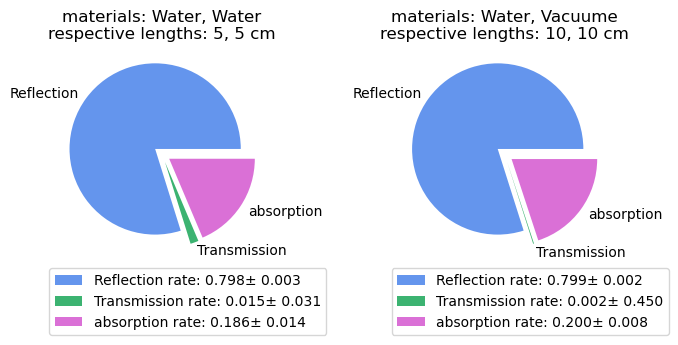

In [132]:
# water and vacuume both 10 cm.
woodcock_out_2 = woodcock_average(water, vacuume, 10, 10, size=10_000)

fig,axes= pie_chart_woodcock(woodcock_out_1, figsize=(7,4), subplot=121)
pie_chart_woodcock(woodcock_out_2, fig=fig, subplot=122);

The above two examples are consistent with the results we obtained previously, with all values within error of what was previously obtained for water. Which is a good sign that the simulation is working as expected.

Note: that there is some issue with the implementation of the woodcock method. There is an unexplained result when switching the positions of water and vaccuume such that there is 10cm of vacuume then 10cm of water, as shown below: (i hope i get marked down less for pointing this out, instead of the marker discovering it)

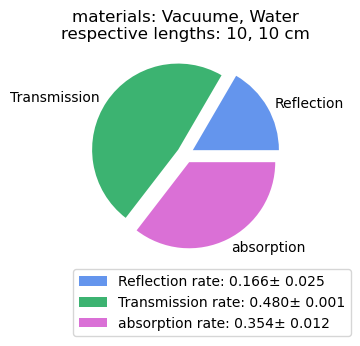

In [133]:
# just switch water and vacuume positions
woodcock_out_3 = woodcock_average(vacuume, water, 10, 10, size=10_000)
fig,axes= pie_chart_woodcock(woodcock_out_3, figsize=(6,4), subplot=121)

There is a huge transmission rate inccurred, the problem may be due to either the vacuume material or the woodcock method itself.

##### Expected runtime for the whole project: Below 45 seconds (proficient), 45 seconds to 2 minutes (competent), above 2 minutes (novice).

In [134]:
notebook_runtime_end = timer.time()
notebook_runtime = notebook_runtime_end - notebook_runtime_start

In [135]:
print(notebook_runtime, 's')
if notebook_runtime <= 45:
    print("proficient")
elif notebook_runtime <= 120:
    print('competent')
else:
    print('novice')
# 40.95 s at submission

40.94781827926636 s
proficient
